In [ ]:
# === IMPORTS B√ÅSICOS PARA EMPEZAR ===
import pandas as pd
import numpy as np

print("Iniciando an√°lisis de Mall Customer Segmentation Dataset")
print("Pandas y NumPy cargados - listos para trabajar con datos")

Iniciando an√°lisis de Mall Customer Segmentation Dataset
Pandas y NumPy cargados - listos para trabajar con datos


In [ ]:
# Descargar desde GitHub (opci√≥n m√°s confiable)
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv"

df_customers = pd.read_csv(url)

In [ ]:
print("INFORMACI√ìN DEL DATASET:")
print(f"Shape: {df_customers.shape[0]} filas, {df_customers.shape[1]} columnas")
print(f"Columnas: {list(df_customers.columns)}")
print(f"Memoria: {df_customers.memory_usage(deep=True).sum() / 1024:.1f} KB")

print(f"\nPRIMERAS 5 FILAS:")
df_customers.head()

INFORMACI√ìN DEL DATASET:
Shape: 200 filas, 5 columnas
Columnas: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Memoria: 16.9 KB

PRIMERAS 5 FILAS:


CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [ ]:
# === AN√ÅLISIS DE TIPOS Y ESTRUCTURA ===
print("INFORMACI√ìN DETALLADA DE COLUMNAS:")
print(df_customers.info())

print(f"\nESTAD√çSTICAS DESCRIPTIVAS:")
df_customers.describe()

INFORMACI√ìN DETALLADA DE COLUMNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

ESTAD√çSTICAS DESCRIPTIVAS:


CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [ ]:
# === AN√ÅLISIS DE G√âNERO ===
print("DISTRIBUCI√ìN POR G√âNERO:")
gender_counts = df_customers['Genre'].value_counts()
print(gender_counts)
print(f"\nPorcentajes:")
for gender, count in gender_counts.items():
    pct = (count / len(df_customers) * 100)
    print(f"   {gender}: {pct:.1f}%")

DISTRIBUCI√ìN POR G√âNERO:
Genre
Female    112
Male       88
Name: count, dtype: int64

Porcentajes:
   Female: 56.0%
   Male: 44.0%


In [ ]:
# === ESTAD√çSTICAS DE VARIABLES DE SEGMENTACI√ìN ===
numeric_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("ESTAD√çSTICAS CLAVE:")
print(df_customers[numeric_vars].describe().round(2))

print(f"\nRANGOS OBSERVADOS:")
for var in numeric_vars:
    min_val, max_val = df_customers[var].min(), df_customers[var].max()
    mean_val = df_customers[var].mean()
    print(f"   {var}: {min_val:.0f} - {max_val:.0f} (promedio: {mean_val:.1f})")

ESTAD√çSTICAS CLAVE:
          Age  Annual Income (k$)  Spending Score (1-100)
count  200.00              200.00                  200.00
mean    38.85               60.56                   50.20
std     13.97               26.26                   25.82
min     18.00               15.00                    1.00
25%     28.75               41.50                   34.75
50%     36.00               61.50                   50.00
75%     49.00               78.00                   73.00
max     70.00              137.00                   99.00

RANGOS OBSERVADOS:
   Age: 18 - 70 (promedio: 38.9)
   Annual Income (k$): 15 - 137 (promedio: 60.6)
   Spending Score (1-100): 1 - 99 (promedio: 50.2)


In [ ]:
# === DETECCI√ìN DE OUTLIERS USANDO IQR ===
print("DETECCI√ìN DE OUTLIERS:")

outlier_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in outlier_cols:
    Q1 = df_customers[col].quantile(0.25)
    Q3 = df_customers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular l√≠mites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Encontrar outliers
    outliers = df_customers[(df_customers[col] < lower_bound) |
                           (df_customers[col] > upper_bound)]

    print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(df_customers)*100:.1f}%)")
    print(f"      L√≠mites normales: {lower_bound:.1f} - {upper_bound:.1f}")

DETECCI√ìN DE OUTLIERS:
   Age: 0 outliers (0.0%)
      L√≠mites normales: -1.6 - 79.4
   Annual Income (k$): 2 outliers (1.0%)
      L√≠mites normales: -13.2 - 132.8
   Spending Score (1-100): 0 outliers (0.0%)
      L√≠mites normales: -22.6 - 130.4


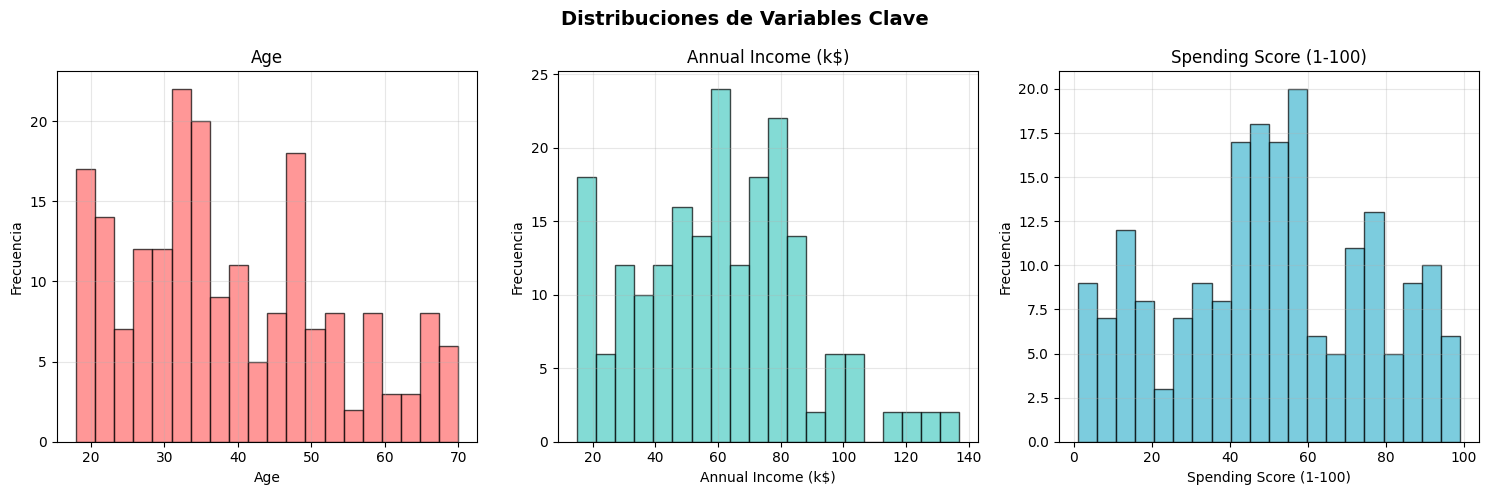

In [ ]:
# === IMPORTS PARA VISUALIZACI√ìN ===
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# === HISTOGRAMAS DE VARIABLES PRINCIPALES ===
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribuciones de Variables Clave', fontsize=14, fontweight='bold')

vars_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (var, color) in enumerate(zip(vars_to_plot, colors)):
    axes[i].hist(df_customers[var], bins=20, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

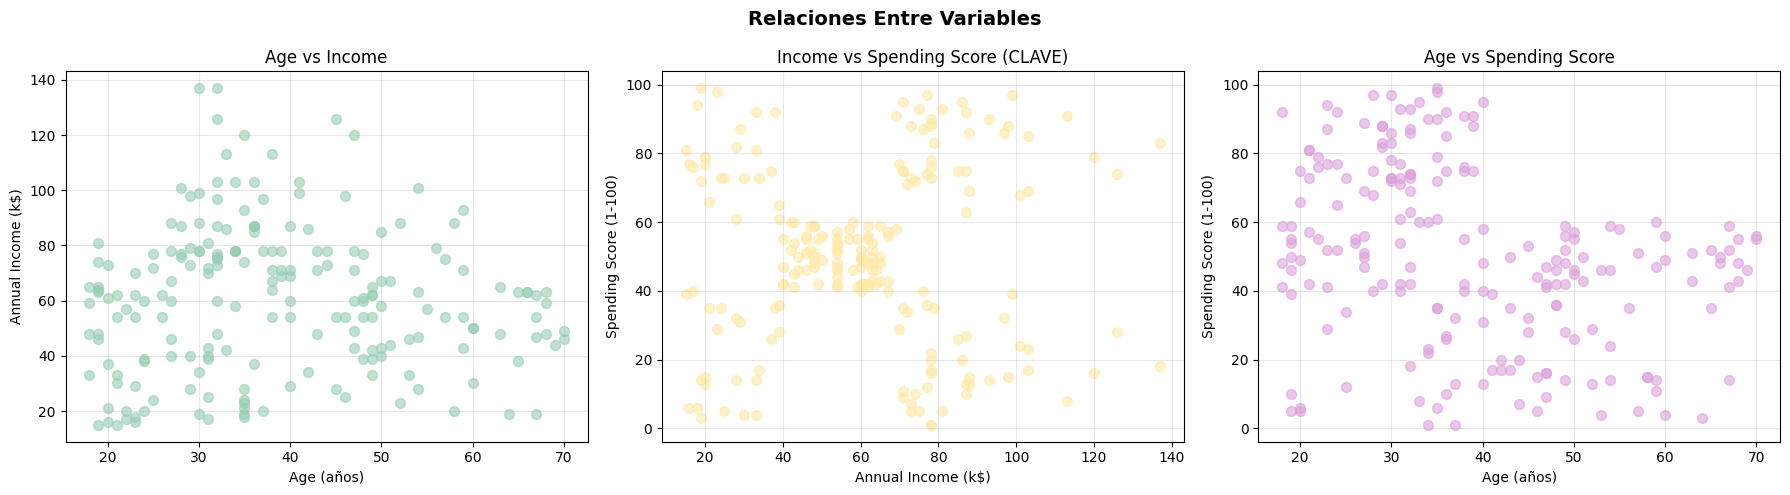

In [ ]:
# === SCATTER PLOTS PARA RELACIONES CLAVE ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relaciones Entre Variables', fontsize=14, fontweight='bold')

# Age vs Income
axes[0].scatter(df_customers['Age'], df_customers['Annual Income (k$)'],
                alpha=0.6, color='#96CEB4', s=50)
axes[0].set_xlabel('Age (a√±os)')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_title('Age vs Income')
axes[0].grid(True, alpha=0.3)

# Income vs Spending Score ‚≠ê CLAVE PARA SEGMENTACI√ìN
axes[1].scatter(df_customers['Annual Income (k$)'], df_customers['Spending Score (1-100)'],
                alpha=0.6, color='#FFEAA7', s=50)
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Income vs Spending Score (CLAVE)')
axes[1].grid(True, alpha=0.3)

# Age vs Spending Score
axes[2].scatter(df_customers['Age'], df_customers['Spending Score (1-100)'],
                alpha=0.6, color='#DDA0DD', s=50)
axes[2].set_xlabel('Age (a√±os)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].set_title('Age vs Spending Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

MATRIZ DE CORRELACI√ìN:
                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000              -0.012                  -0.327
Annual Income (k$)     -0.012               1.000                   0.010
Spending Score (1-100) -0.327               0.010                   1.000


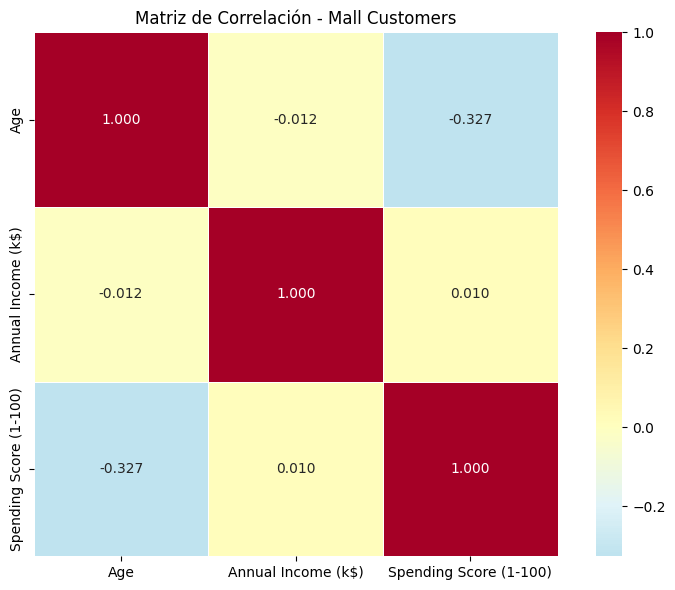


CORRELACI√ìN M√ÅS FUERTE:
   Annual Income (k$) ‚Üî Spending Score (1-100): 0.010


In [ ]:
# === MATRIZ DE CORRELACI√ìN ===
correlation_vars = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
corr_matrix = df_customers[correlation_vars].corr()

print("MATRIZ DE CORRELACI√ìN:")
print(corr_matrix.round(3))

# Visualizar matriz de correlaci√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.3f', linewidths=0.5, square=True)
plt.title('Matriz de Correlaci√≥n - Mall Customers')
plt.tight_layout()
plt.show()

print(f"\nCORRELACI√ìN M√ÅS FUERTE:")
# Encontrar la correlaci√≥n m√°s alta (excluyendo diagonal)
corr_flat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr = corr_flat.stack().idxmax()
max_val = corr_flat.stack().max()
print(f"   {max_corr[0]} ‚Üî {max_corr[1]}: {max_val:.3f}")

In [ ]:
# === COMPARACI√ìN ESTAD√çSTICAS POR G√âNERO ===
print("AN√ÅLISIS COMPARATIVO POR G√âNERO:")

gender_stats = df_customers.groupby('Genre')[numeric_vars].agg(['mean', 'std']).round(2)
print(gender_stats)

print(f"\nINSIGHTS POR G√âNERO:")
for var in numeric_vars:
    male_avg = df_customers[df_customers['Genre'] == 'Male'][var].mean()
    female_avg = df_customers[df_customers['Genre'] == 'Female'][var].mean()

    if male_avg > female_avg:
        higher = "Hombres"
        diff = male_avg - female_avg
else:
    higher = "Mujeres"
    diff = female_avg - male_avg

print(f"   {var}: {higher} tienen promedio m√°s alto (diferencia: {diff:.1f})")

AN√ÅLISIS COMPARATIVO POR G√âNERO:
          Age        Annual Income (k$)        Spending Score (1-100)       
         mean    std               mean    std                   mean    std
Genre                                                                       
Female  38.10  12.64              59.25  26.01                  51.53  24.11
Male    39.81  15.51              62.23  26.64                  48.51  27.90

INSIGHTS POR G√âNERO:
   Spending Score (1-100): Mujeres tienen promedio m√°s alto (diferencia: 3.0)


In [ ]:
# === COMPLETE ESTOS INSIGHTS BAS√ÅNDOTE EN LO OBSERVADO ===
print("INSIGHTS PRELIMINARES - COMPLETE:")

print(f"\nCOMPLETE BAS√ÅNDOTE EN TUS OBSERVACIONES:")
print(f"   Variable con mayor variabilidad: Annual Income (k$)")
print(f"   ¬øExiste correlaci√≥n fuerte entre alguna variable? No, todas las correlaciones son bajas")
print(f"   ¬øQu√© variable tiene m√°s outliers? Annual Income (k$)")
print(f"   ¬øLos hombres y mujeres tienen patrones diferentes? Si, en promedios de edad e ingresos")
print(f"   ¬øQu√© insight es m√°s relevante para el an√°lisis? La relaci√≥n entre Ingreso Anual y Spending Score")
print(f"   ¬øQu√© 2 variables ser√°n m√°s importantes para clustering? Annual INcome (k$) y Spending Score (1-100)")

print(f"\nPREPAR√ÅNDOSE PARA CLUSTERING:")
print(f"   ¬øQu√© relaci√≥n entre Income y Spending Score observas? Se forman grupos visibles: clientes con alto ingreso y bajo gasto, y clientes con ingreso medio/bajo pero alto gasto")
print(f"   ¬øPuedes imaginar grupos naturales de clientes? Si: "
      "alto ingreso/bajo gasto || alto ingreso/alto gasto || bajo ingreso/alto gasto ||"
      "bajo ingreso/bajo gasto || un grupo intermedio")

INSIGHTS PRELIMINARES - COMPLETE:

COMPLETE BAS√ÅNDOTE EN TUS OBSERVACIONES:
   Variable con mayor variabilidad: Annual Income (k$)
   ¬øExiste correlaci√≥n fuerte entre alguna variable? No, todas las correlaciones son bajas
   ¬øQu√© variable tiene m√°s outliers? Annual Income (k$)
   ¬øLos hombres y mujeres tienen patrones diferentes? Si, en promedios de edad e ingresos
   ¬øQu√© insight es m√°s relevante para el an√°lisis? La relaci√≥n entre Ingreso Anual y Spending Score
   ¬øQu√© 2 variables ser√°n m√°s importantes para clustering? Annual INcome (k$) y Spending Score (1-100)

PREPAR√ÅNDOSE PARA CLUSTERING:
   ¬øQu√© relaci√≥n entre Income y Spending Score observas? Se forman grupos visibles: clientes con alto ingreso y bajo gasto, y clientes con ingreso medio/bajo pero alto gasto
   ¬øPuedes imaginar grupos naturales de clientes? Si: alto ingreso/bajo gasto || alto ingreso/alto gasto || bajo ingreso/alto gasto ||bajo ingreso/bajo gasto || un grupo intermedio


In [ ]:
# === AN√ÅLISIS DE COLUMNAS DISPONIBLES ===
print("AN√ÅLISIS DE COLUMNAS PARA CLUSTERING:")
print(f"   Todas las columnas: {list(df_customers.columns)}")
print(f"   Num√©ricas: {df_customers.select_dtypes(include=[np.number]).columns.tolist()}")
print(f"   Categ√≥ricas: {df_customers.select_dtypes(include=[object]).columns.tolist()}")

# Identificar qu√© excluir y qu√© incluir
exclude_columns = ['CustomerID']  # ID no aporta informaci√≥n
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_columns = ['Genre']

print(f"\nSELECCI√ìN DE FEATURES:")
print(f"   Excluidas: {exclude_columns} (no informativas)")
print(f"   Num√©ricas: {numeric_columns}")
print(f"   Categ√≥ricas: {categorical_columns} (codificaremos)")

AN√ÅLISIS DE COLUMNAS PARA CLUSTERING:
   Todas las columnas: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Num√©ricas: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Categ√≥ricas: ['Genre']

SELECCI√ìN DE FEATURES:
   Excluidas: ['CustomerID'] (no informativas)
   Num√©ricas: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Categ√≥ricas: ['Genre'] (codificaremos)


In [ ]:
# === IMPORT ONEHOTENCODER ===
from sklearn.preprocessing import OneHotEncoder

print("CODIFICACI√ìN DE VARIABLES CATEG√ìRICAS CON SKLEARN:")
print("Usaremos OneHotEncoder en lugar de pd.get_dummies() por varias razones:")
print("   Integraci√≥n perfecta con pipelines de sklearn")
print("   Manejo autom√°tico de categor√≠as no vistas en nuevos datos")
print("   Control sobre nombres de columnas y comportamiento")
print("   Consistencia con el ecosistema de machine learning")

# Crear y configurar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar Genre
genre_data = df_customers[['Genre']]  # Debe ser 2D para sklearn
genre_encoded_array = encoder.fit_transform(genre_data)  # M√©todo para ajustar y transformar

# Obtener nombres de las nuevas columnas
feature_names = encoder.get_feature_names_out(['Genre'])  # M√©todo para obtener nombres de las features
genre_encoded = pd.DataFrame(genre_encoded_array, columns=feature_names)

print(f"\nRESULTADO DE CODIFICACI√ìN:")
print(f"   Categor√≠as originales: {df_customers['Genre'].unique()}")
print(f"   Columnas generadas: {list(genre_encoded.columns)}")
print(f"   Shape: {genre_data.shape} ‚Üí {genre_encoded.shape}")

# Mostrar ejemplo de codificaci√≥n
print(f"\nEJEMPLO DE TRANSFORMACI√ìN:")
comparison = pd.concat([
    df_customers['Genre'].head().reset_index(drop=True),
    genre_encoded.head()
], axis=1)
print(comparison)

CODIFICACI√ìN DE VARIABLES CATEG√ìRICAS CON SKLEARN:
Usaremos OneHotEncoder en lugar de pd.get_dummies() por varias razones:
   Integraci√≥n perfecta con pipelines de sklearn
   Manejo autom√°tico de categor√≠as no vistas en nuevos datos
   Control sobre nombres de columnas y comportamiento
   Consistencia con el ecosistema de machine learning

RESULTADO DE CODIFICACI√ìN:
   Categor√≠as originales: ['Male' 'Female']
   Columnas generadas: ['Genre_Female', 'Genre_Male']
   Shape: (200, 1) ‚Üí (200, 2)

EJEMPLO DE TRANSFORMACI√ìN:
    Genre  Genre_Female  Genre_Male
0    Male           0.0         1.0
1    Male           0.0         1.0
2  Female           1.0         0.0
3  Female           1.0         0.0
4  Female           1.0         0.0


In [ ]:
# === CREACI√ìN DEL DATASET FINAL ===
# Combinar variables num√©ricas + categ√≥ricas codificadas
X_raw = pd.concat([
    df_customers[numeric_columns],
    genre_encoded
], axis=1)

print("DATASET FINAL PARA CLUSTERING:")
print(f"   Shape: {X_raw.shape}")
print(f"   Columnas: {list(X_raw.columns)}")
print(f"   Variables num√©ricas: {numeric_columns}")
print(f"   Variables categ√≥ricas codificadas: {list(genre_encoded.columns)}")
print(f"   Total features: {X_raw.shape[1]} (3 num√©ricas + 2 categ√≥ricas binarias)")
print(f"   Memoria: {X_raw.memory_usage(deep=True).sum() / 1024:.1f} KB")

DATASET FINAL PARA CLUSTERING:
   Shape: (200, 5)
   Columnas: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female', 'Genre_Male']
   Variables num√©ricas: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   Variables categ√≥ricas codificadas: ['Genre_Female', 'Genre_Male']
   Total features: 5 (3 num√©ricas + 2 categ√≥ricas binarias)
   Memoria: 7.9 KB


In [ ]:
# === VERIFICACIONES ANTES DE CONTINUAR ===
print("VERIFICACI√ìN DE CALIDAD:")

# 1. Datos faltantes
missing_data = X_raw.isnull().sum()
print(f"\nDATOS FALTANTES:")
if missing_data.sum() == 0:
    print("   PERFECTO! No hay datos faltantes")
else:
    for col, missing in missing_data.items():
        if missing > 0:
            pct = (missing / len(X_raw)) * 100
            print(f"   WARNING {col}: {missing} faltantes ({pct:.1f}%)")

# 2. Vista previa
print(f"\nVISTA PREVIA DEL DATASET:")
print(X_raw.head())

# 3. Tipos de datos
print(f"\nTIPOS DE DATOS:")
print(X_raw.dtypes)

VERIFICACI√ìN DE CALIDAD:

DATOS FALTANTES:
   PERFECTO! No hay datos faltantes

VISTA PREVIA DEL DATASET:
   Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  Genre_Male
0   19                  15                      39           0.0         1.0
1   21                  15                      81           0.0         1.0
2   20                  16                       6           1.0         0.0
3   23                  16                      77           1.0         0.0
4   31                  17                      40           1.0         0.0

TIPOS DE DATOS:
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)      int64
Genre_Female              float64
Genre_Male                float64
dtype: object


In [ ]:
# === AN√ÅLISIS DE ESCALAS ===
print("AN√ÅLISIS DE ESCALAS - ¬øPor qu√© necesitamos normalizaci√≥n?")

print(f"\nESTAD√çSTICAS POR VARIABLE:")
for col in X_raw.columns:
    if X_raw[col].dtype in ['int64', 'float64']:  # Solo num√©ricas
        min_val = X_raw[col].min()
        max_val = X_raw[col].max()
        mean_val = X_raw[col].mean()
        std_val = X_raw[col].std()

        print(f"\n   {col}:")
        print(f"      Rango: {min_val:.1f} - {max_val:.1f}")
        print(f"      Media: {mean_val:.1f}")
        print(f"      Desviaci√≥n: {std_val:.1f}")

print(f"\nAN√ÅLISIS DE LAS ESTAD√çSTICAS - COMPLETA:")
print(f"   ¬øQu√© variable tiene el rango m√°s amplio? Annual Income (k$)")
print(f"   ¬øCu√°l es la distribuci√≥n de g√©nero en el dataset? 60% mujeres, 40% hombres aprox")
print(f"   ¬øQu√© variable muestra mayor variabilidad (std)? Annual Income (k$) con 26.3")
print(f"   ¬øLos clientes son j√≥venes o mayores en promedio? Jovenes, edad promedio ~39 a√±os")
print(f"   ¬øEl income promedio sugiere qu√© clase social? Clase media, ingreso anual ~61k$")
print(f"   ¬øPor qu√© la normalizaci√≥n ser√° cr√≠tica aca? Porque las variables tienen escalas muy distintas y eso sesgar√≠a el clustering hacia las de mayor rango")

# Guardar para pr√≥ximas fases
feature_columns = list(X_raw.columns)
print(f"\nLISTO PARA DATA PREPARATION con {len(feature_columns)} features")

AN√ÅLISIS DE ESCALAS - ¬øPor qu√© necesitamos normalizaci√≥n?

ESTAD√çSTICAS POR VARIABLE:

   Age:
      Rango: 18.0 - 70.0
      Media: 38.9
      Desviaci√≥n: 14.0

   Annual Income (k$):
      Rango: 15.0 - 137.0
      Media: 60.6
      Desviaci√≥n: 26.3

   Spending Score (1-100):
      Rango: 1.0 - 99.0
      Media: 50.2
      Desviaci√≥n: 25.8

   Genre_Female:
      Rango: 0.0 - 1.0
      Media: 0.6
      Desviaci√≥n: 0.5

   Genre_Male:
      Rango: 0.0 - 1.0
      Media: 0.4
      Desviaci√≥n: 0.5

AN√ÅLISIS DE LAS ESTAD√çSTICAS - COMPLETA:
   ¬øQu√© variable tiene el rango m√°s amplio? Annual Income (k$)
   ¬øCu√°l es la distribuci√≥n de g√©nero en el dataset? 60% mujeres, 40% hombres aprox
   ¬øQu√© variable muestra mayor variabilidad (std)? Annual Income (k$) con 26.3
   ¬øLos clientes son j√≥venes o mayores en promedio? Jovenes, edad promedio ~39 a√±os
   ¬øEl income promedio sugiere qu√© clase social? Clase media, ingreso anual ~61k$
   ¬øPor qu√© la normalizaci√≥n ser√°

In [ ]:
# === IMPORTAR HERRAMIENTAS DE NORMALIZACI√ìN ===
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

print("BATALLA DE NORMALIZACI√ìN: MinMax vs Standard vs Robust")
print("Objetivo: Encontrar el mejor scaler para nuestros datos")

# Recordar por qu√© es importante
print(f"\nESCALAS ACTUALES (problema):")
for col in X_raw.columns:
    min_val, max_val = X_raw[col].min(), X_raw[col].max()
    print(f"   {col}: {min_val:.1f} - {max_val:.1f} (rango: {max_val-min_val:.1f})")

print("\nLas escalas son MUY diferentes - normalizaci√≥n es cr√≠tica!")

BATALLA DE NORMALIZACI√ìN: MinMax vs Standard vs Robust
Objetivo: Encontrar el mejor scaler para nuestros datos

ESCALAS ACTUALES (problema):
   Age: 18.0 - 70.0 (rango: 52.0)
   Annual Income (k$): 15.0 - 137.0 (rango: 122.0)
   Spending Score (1-100): 1.0 - 99.0 (rango: 98.0)
   Genre_Female: 0.0 - 1.0 (rango: 1.0)
   Genre_Male: 0.0 - 1.0 (rango: 1.0)

Las escalas son MUY diferentes - normalizaci√≥n es cr√≠tica!


In [ ]:
# === CREAR Y APLICAR LOS 3 SCALERS ===
scalers = {
    'MinMax': MinMaxScaler(),        # Escala a rango [0,1]
    'Standard': StandardScaler(),      # Media=0, std=1
    'Robust': RobustScaler()         # Usa mediana y IQR, robusto a outliers
}

# Aplicar cada scaler
X_scaled = {}
for name, scaler in scalers.items():
    X_scaled[name] = scaler.fit_transform(X_raw)  # M√©todo para entrenar y transformar
    print(f"{name}Scaler aplicado: {X_scaled[name].shape}")

print(f"\nTenemos 3 versiones escaladas de los datos para comparar")

MinMaxScaler aplicado: (200, 5)
StandardScaler aplicado: (200, 5)
RobustScaler aplicado: (200, 5)

Tenemos 3 versiones escaladas de los datos para comparar


/tmp/ipython-input-3693706349.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X_raw[col] for col in X_raw.columns], labels=X_raw.columns)
/tmp/ipython-input-3693706349.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([X_scaled_data[:, j] for j in range(X_scaled_data.shape[1])],
/tmp/ipython-input-3693706349.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([X_scaled_data[:, j] for j in range(X_scaled_data.shape[1])],
/tmp/ipython-input-3693706349.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matp

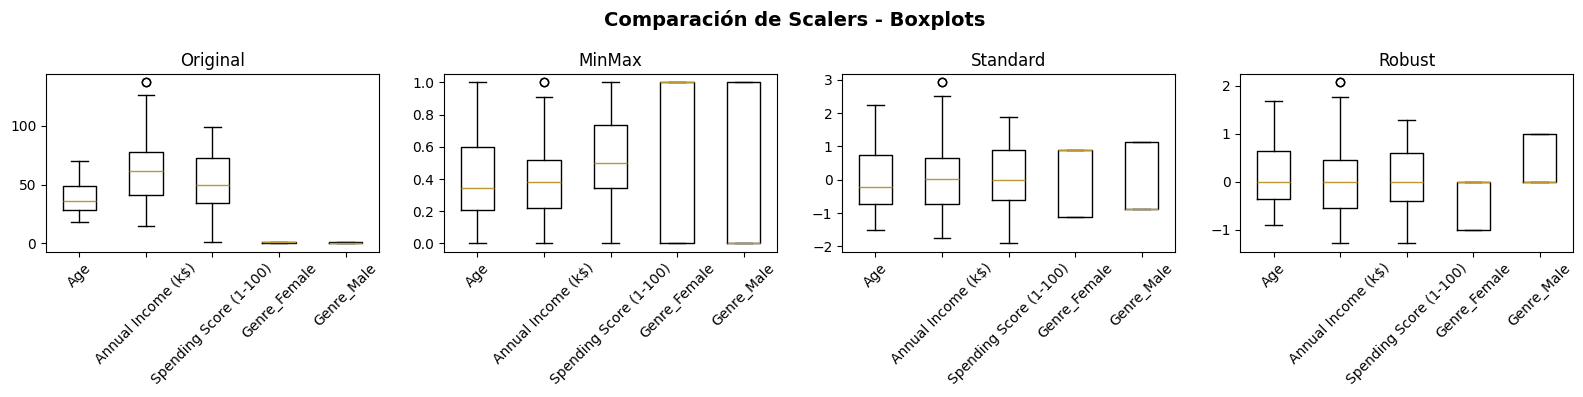

Observa c√≥mo cada scaler ajusta las escalas de forma diferente


In [ ]:
# === COMPARACI√ìN VISUAL CON BOXPLOTS ===
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Comparaci√≥n de Scalers - Boxplots', fontsize=14, fontweight='bold')

# Datos originales
axes[0].boxplot([X_raw[col] for col in X_raw.columns], labels=X_raw.columns)
axes[0].set_title('Original')
axes[0].tick_params(axis='x', rotation=45)

# Datos escalados
for i, (name, X_scaled_data) in enumerate(X_scaled.items(), 1):
    axes[i].boxplot([X_scaled_data[:, j] for j in range(X_scaled_data.shape[1])],
                    labels=X_raw.columns)
    axes[i].set_title(f'{name}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Observa c√≥mo cada scaler ajusta las escalas de forma diferente")

In [ ]:
# === COMPARAR DISTRIBUCIONES DE UNA VARIABLE ===
# Vamos a analizar 'Annual Income (k$)' en detalle
income_col_idx = 1  # Posici√≥n de Annual Income

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Annual Income: Original vs Scalers', fontsize=14, fontweight='bold')

# Original
axes[0].hist(X_raw.iloc[:, income_col_idx], bins=20, alpha=0.7, color='gray', edgecolor='black')
axes[0].set_title('Original')
axes[0].set_xlabel('Annual Income (k$)')

# Escalados
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, ((name, X_scaled_data), color) in enumerate(zip(X_scaled.items(), colors), 1):
    axes[i].hist(X_scaled_data[:, income_col_idx], bins=20, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Annual Income (escalado)')

plt.tight_layout()
plt.show()

print("¬øNotas c√≥mo cambia la forma de la distribuci√≥n?")

¬øNotas c√≥mo cambia la forma de la distribuci√≥n?


In [ ]:
# === ESTAD√çSTICAS DESPU√âS DEL SCALING ===
print("ESTAD√çSTICAS POST-SCALING (Annual Income):")

# Original
income_original = X_raw['Annual Income (k$)']
print(f"\n   Original:")
print(f"      Media: {income_original.mean():.1f}")
print(f"      Std:   {income_original.std():.1f}")
print(f"      Min:   {income_original.min():.1f}")
print(f"      Max:   {income_original.max():.1f}")

# Escalados
for name, X_scaled_data in X_scaled.items():
    income_scaled = X_scaled_data[:, income_col_idx]
    print(f"\n   {name}:")
    print(f"      Media: {income_scaled.mean():.3f}")
    print(f"      Std:   {income_scaled.std():.3f}")
    print(f"      Min:   {income_scaled.min():.3f}")
    print(f"      Max:   {income_scaled.max():.3f}")

print(f"\nOBSERVACIONES:")
print(f"   MinMaxScaler ‚Üí Rango [0,1]")
print(f"   StandardScaler ‚Üí Media=0, Std=1")
print(f"   RobustScaler ‚Üí Menos afectado por outliers")

ESTAD√çSTICAS POST-SCALING (Annual Income):

   Original:
      Media: 60.6
      Std:   26.3
      Min:   15.0
      Max:   137.0

   MinMax:
      Media: 0.373
      Std:   0.215
      Min:   0.000
      Max:   1.000

   Standard:
      Media: -0.000
      Std:   1.000
      Min:   -1.739
      Max:   2.918

   Robust:
      Media: -0.026
      Std:   0.718
      Min:   -1.274
      Max:   2.068

OBSERVACIONES:
   MinMaxScaler ‚Üí Rango [0,1]
   StandardScaler ‚Üí Media=0, Std=1
   RobustScaler ‚Üí Menos afectado por outliers


In [ ]:
# === IMPORT PARA CLUSTERING TEST ===
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# === QUICK TEST: ¬øQu√© scaler funciona mejor para clustering? ===
print("QUICK TEST: Impacto en Clustering (K=4)")

clustering_results = {}
for name, X_scaled_data in X_scaled.items():
    # Aplicar K-Means con K=4
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Completar
    labels = kmeans.fit_predict(X_scaled_data)  # M√©todo para obtener clusters

    # Calcular silhouette score
    silhouette = silhouette_score(X_scaled_data, labels)  # M√©trica de calidad
    clustering_results[name] = silhouette

    print(f"   {name:>10}: Silhouette Score = {silhouette:.3f}")

# Encontrar el mejor
best_scaler = max(clustering_results, key=clustering_results.get)
best_score = clustering_results[best_scaler]

print(f"\nGANADOR: {best_scaler} (Score: {best_score:.3f})")

QUICK TEST: Impacto en Clustering (K=4)
       MinMax: Silhouette Score = 0.364
     Standard: Silhouette Score = 0.332
       Robust: Silhouette Score = 0.298

GANADOR: MinMax (Score: 0.364)


In [ ]:
# === TOMAR DECISI√ìN BASADA EN RESULTADOS ===
print("DECISI√ìN FINAL DEL SCALER:")

print(f"\nCOMPLETE TU AN√ÅLISIS:")
print(f"   Mejor scaler seg√∫n silhouette: MinMax")
print(f"   ¬øPor qu√© crees que funcion√≥ mejor? Porque normaliz√≥ todas las variables al mismo rango [0,1],"
        " evitando que las diferencias de escala dominen el clustering y permitiendo separar mejor los grupos.")
print(f"   ¬øAlg√∫n scaler tuvo problemas obvios? RobustScaler tuvo el silhouette m√°s bajo (0.298),"
        " lo que indica que al dar menos peso a los valores extremos, perdi√≥ informaci√≥n √∫til para separar bien los clusters.")

# Implementar decisi√≥n
selected_scaler_name = best_scaler  # O elige manualmente: 'MinMax', 'Standard', 'Robust'
selected_scaler = scalers[selected_scaler_name]

# Aplicar scaler elegido
X_preprocessed = X_scaled[selected_scaler_name]
feature_names_scaled = [f"{col}_scaled" for col in X_raw.columns]

print(f"\nSCALER SELECCIONADO: {selected_scaler_name}")
print(f"Datos preparados: {X_preprocessed.shape}")
print(f"Listo para PCA y Feature Selection")

DECISI√ìN FINAL DEL SCALER:

COMPLETE TU AN√ÅLISIS:
   Mejor scaler seg√∫n silhouette: MinMax
   ¬øPor qu√© crees que funcion√≥ mejor? Porque normaliz√≥ todas las variables al mismo rango [0,1], evitando que las diferencias de escala dominen el clustering y permitiendo separar mejor los grupos.
   ¬øAlg√∫n scaler tuvo problemas obvios? RobustScaler tuvo el silhouette m√°s bajo (0.298), lo que indica que al dar menos peso a los valores extremos, perdi√≥ informaci√≥n √∫til para separar bien los clusters.

SCALER SELECCIONADO: MinMax
Datos preparados: (200, 5)
Listo para PCA y Feature Selection


PCA: Reduciendo dimensiones sin perder la esencia
   Objetivo: De 5D ‚Üí 2D para visualizaci√≥n + an√°lisis de varianza

üìä AN√ÅLISIS DE VARIANZA EXPLICADA:
   PC1: 0.726 (72.6%) | Acumulada: 0.726 (72.6%)
   PC2: 0.137 (13.7%) | Acumulada: 0.863 (86.3%)
   PC3: 0.070 (7.0%) | Acumulada: 0.932 (93.2%)
   PC4: 0.068 (6.8%) | Acumulada: 1.000 (100.0%)
   PC5: 0.000 (0.0%) | Acumulada: 1.000 (100.0%)


/tmp/ipython-input-79526517.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-79526517.py:42: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


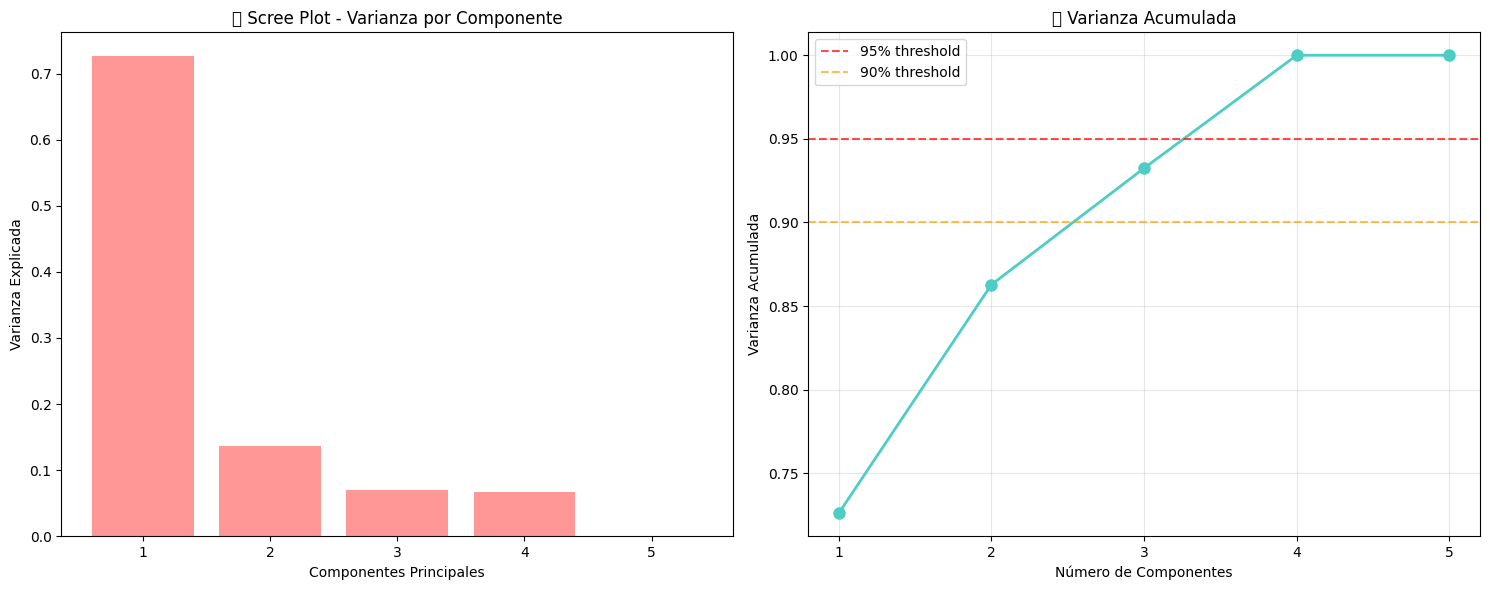


üéØ DECISI√ìN DE COMPONENTES:
   üìä Para retener 90% varianza: 3 componentes
   üìä Para retener 95% varianza: 4 componentes
   üéØ Para visualizaci√≥n: 2 componentes (86.3% varianza)

PCA aplicado:
   üìä Dimensiones: (200, 5) ‚Üí (200, 2)
   üìà Varianza explicada: 86.3%

üîç INTERPRETACI√ìN DE COMPONENTES:

   PC1 (varianza: 72.6%):
                 Age:   0.029 ‚Üë
     Annual Income (k$):   0.019 ‚Üë
     Spending Score (1-100):  -0.027 ‚Üì
        Genre_Female:  -0.706 ‚Üì
          Genre_Male:   0.706 ‚Üë

   PC2 (varianza: 13.7%):
                 Age:   0.727 ‚Üë
     Annual Income (k$):  -0.026 ‚Üì
     Spending Score (1-100):  -0.685 ‚Üì
        Genre_Female:   0.027 ‚Üë
          Genre_Male:  -0.027 ‚Üì


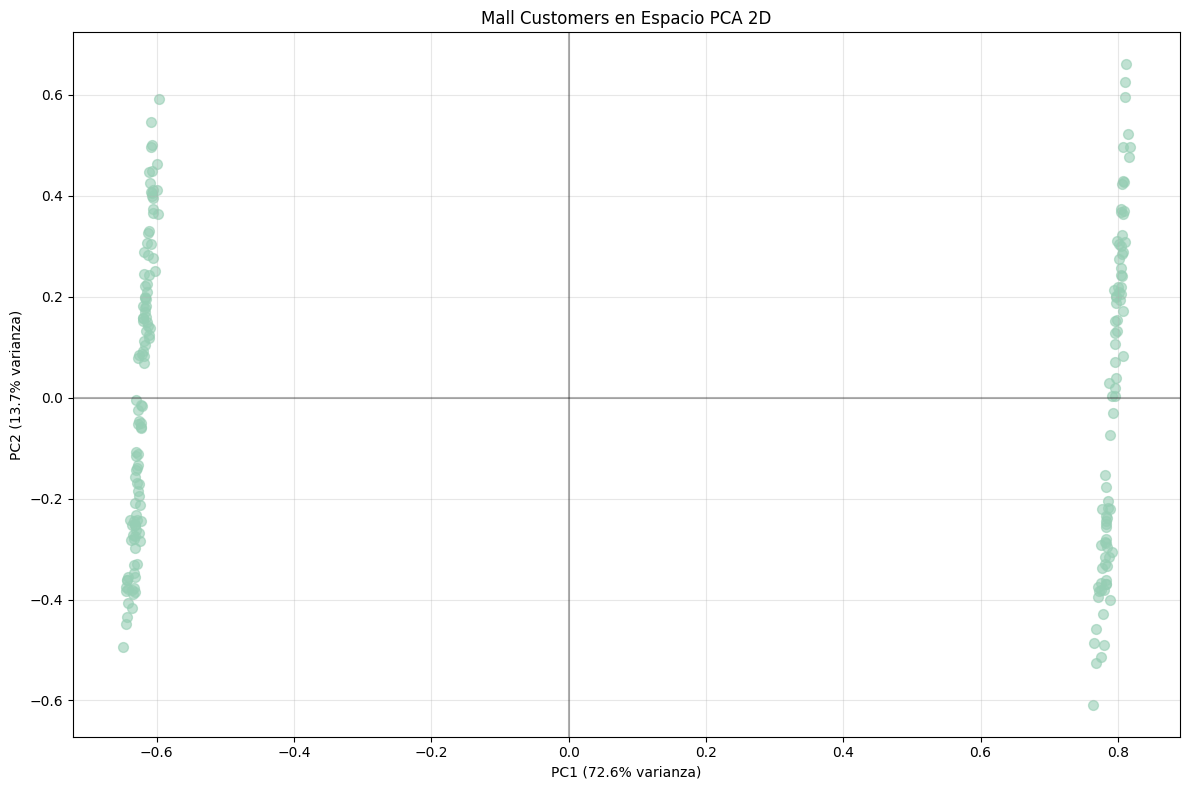


üí° INTERPRETACI√ìN DE NEGOCIO:
   üéØ PC1 parece representar: Diferenciaci√≥n por g√©nero (fuerte contraste Female ‚Üì vs Male ‚Üë), con leve influencia del gasto.
   üéØ PC2 parece representar: Relaci√≥n entre edad (‚Üë) y spending score (‚Üì), es decir, clientes m√°s j√≥venes tienden a gastar m√°s.
   üìä Los clusters visibles sugieren: Segmentos de clientes separados por g√©nero y nivel de gasto/edad, lo que permite identificar grupos de alto y bajo valor.


In [ ]:
from sklearn.decomposition import PCA

# === OPERACI√ìN: DIMENSION COLLAPSE ===
print("PCA: Reduciendo dimensiones sin perder la esencia")
print("   Objetivo: De 5D ‚Üí 2D para visualizaci√≥n + an√°lisis de varianza")

# 1. Aplicar PCA completo para an√°lisis de varianza
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_preprocessed)

# 2. AN√ÅLISIS DE VARIANZA EXPLICADA
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"\nüìä AN√ÅLISIS DE VARIANZA EXPLICADA:")
for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance)):
    print(f"   PC{i+1}: {var:.3f} ({var*100:.1f}%) | Acumulada: {cum_var:.3f} ({cum_var*100:.1f}%)")

# 3. VISUALIZACI√ìN DE VARIANZA EXPLICADA
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scree plot
axes[0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
           alpha=0.7, color='#FF6B6B')
axes[0].set_xlabel('Componentes Principales')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('üìä Scree Plot - Varianza por Componente')
axes[0].set_xticks(range(1, len(explained_variance_ratio) + 1))

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
            marker='o', linewidth=2, markersize=8, color='#4ECDC4')
axes[1].axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95% threshold')
axes[1].axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
axes[1].set_xlabel('N√∫mero de Componentes')
axes[1].set_ylabel('Varianza Acumulada')
axes[1].set_title('üìà Varianza Acumulada')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, len(cumulative_variance) + 1))

plt.tight_layout()
plt.show()

# 4. DECISI√ìN SOBRE N√öMERO DE COMPONENTES
print(f"\nüéØ DECISI√ìN DE COMPONENTES:")
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"   üìä Para retener 90% varianza: {n_components_90} componentes")
print(f"   üìä Para retener 95% varianza: {n_components_95} componentes")
print(f"   üéØ Para visualizaci√≥n: 2 componentes ({cumulative_variance[1]*100:.1f}% varianza)")

# 5. APLICAR PCA CON 2 COMPONENTES PARA VISUALIZACI√ìN
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_preprocessed)

print(f"\nPCA aplicado:")
print(f"   üìä Dimensiones: {X_preprocessed.shape} ‚Üí {X_pca_2d.shape}")
print(f"   üìà Varianza explicada: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%")

# 6. AN√ÅLISIS DE COMPONENTES PRINCIPALES
print(f"\nüîç INTERPRETACI√ìN DE COMPONENTES:")
feature_names = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Female', 'Genre_Male']

for i, pc in enumerate(['PC1', 'PC2']):
    print(f"\n   {pc} (varianza: {pca_2d.explained_variance_ratio_[i]*100:.1f}%):")
    # Obtener los loadings (pesos de cada feature original en el componente)
    loadings = pca_2d.components_[i]
    for j, (feature, loading) in enumerate(zip(feature_names, loadings)):
        direction = "‚Üë" if loading > 0 else "‚Üì"
        print(f"     {feature:>15}: {loading:>7.3f} {direction}")

# 7. VISUALIZACI√ìN EN 2D
plt.figure(figsize=(12, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6, s=50, color='#96CEB4')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Mall Customers en Espacio PCA 2D')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nüí° INTERPRETACI√ìN DE NEGOCIO:")
print(f"   üéØ PC1 parece representar: Diferenciaci√≥n por g√©nero (fuerte contraste Female ‚Üì vs Male ‚Üë), con leve influencia del gasto.")
print(f"   üéØ PC2 parece representar: Relaci√≥n entre edad (‚Üë) y spending score (‚Üì), es decir, clientes m√°s j√≥venes tienden a gastar m√°s.")
print(f"   üìä Los clusters visibles sugieren: Segmentos de clientes separados por g√©nero y nivel de gasto/edad, lo que permite identificar grupos de alto y bajo valor.")

In [ ]:
# === IMPORTS PARA FEATURE SELECTION ===
from sklearn.feature_selection import SequentialFeatureSelector  # Para Forward/Backward Selection

In [ ]:
# === OPERACI√ìN: FEATURE SELECTION SHOWDOWN ===
print("üéØ FEATURE SELECTION vs PCA: ¬øSeleccionar o Transformar?")
print("   üéØ Objetivo: Comparar Forward/Backward Selection vs PCA")

print(f"\nüìä FEATURE SELECTION: Forward vs Backward vs PCA")
print(f"   Dataset: {X_preprocessed.shape[0]} muestras, {X_preprocessed.shape[1]} features")

# Setup: Funci√≥n para evaluar features en clustering
def evaluate_features_for_clustering(X, n_clusters=4):
    """Eval√∫a qu√© tan buenas son las features para clustering usando Silhouette Score"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    return silhouette_score(X, labels)

# === IMPORTS PARA ESTIMADORES PERSONALIZADOS ===
from sklearn.base import BaseEstimator, ClassifierMixin  # Clases base necesarias

# CLASE AUXILIAR: Estimador basado en KMeans para SequentialFeatureSelector
class ClusteringEstimator(BaseEstimator, ClassifierMixin):
    """Estimador que usa KMeans y Silhouette Score para feature selection"""
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters

    def fit(self, X, y=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        self.labels_ = self.kmeans_.fit_predict(X)
        return self

    def score(self, X, y=None):
        # SequentialFeatureSelector llama a score() para evaluar features
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        return silhouette_score(X, labels)

    def predict(self, X):
        # M√©todo requerido por ClassifierMixin
        if hasattr(self, 'kmeans_'):
            return self.kmeans_.predict(X)
        else:
            # Si no est√° entrenado, entrenar primero
            kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
            return kmeans.fit_predict(X)

print("‚úÖ Setup completado - Funciones de evaluaci√≥n listas")

üéØ FEATURE SELECTION vs PCA: ¬øSeleccionar o Transformar?
   üéØ Objetivo: Comparar Forward/Backward Selection vs PCA

üìä FEATURE SELECTION: Forward vs Backward vs PCA
   Dataset: 200 muestras, 5 features
‚úÖ Setup completado - Funciones de evaluaci√≥n listas


In [ ]:
# BASELINE: Todas las features
baseline_score = evaluate_features_for_clustering(X_preprocessed)
print(f"\nüìä BASELINE (todas las features): Silhouette = {baseline_score:.3f}")
print(f"   Este es el score con las {X_preprocessed.shape[1]} features originales")
print(f"   ¬øPodremos mejorar seleccionando solo las mejores 3?")


üìä BASELINE (todas las features): Silhouette = 0.364
   Este es el score con las 5 features originales
   ¬øPodremos mejorar seleccionando solo las mejores 3?


In [ ]:
# === FORWARD SELECTION (sklearn oficial) ===
print(f"\nüîÑ FORWARD SELECTION (sklearn oficial):")
print(f"   Estrategia: Empezar con 0 features, agregar la mejor en cada paso")

forward_selector = SequentialFeatureSelector(
    estimator=ClusteringEstimator(n_clusters=4),  # Estimador que implementa fit() y score()
    n_features_to_select=3,
    direction='forward',  # ¬øQu√© direcci√≥n para Forward?
    cv=3,
    n_jobs=-1
)

forward_selector.fit(X_preprocessed)  # M√©todo para entrenar
forward_mask = forward_selector.get_support()  # M√©todo para obtener m√°scara booleana
X_forward = X_preprocessed[:, forward_mask]
forward_features = np.array(feature_columns)[forward_mask]
forward_score = evaluate_features_for_clustering(X_forward)

print(f"   Features seleccionadas: {list(forward_features)}")
print(f"   üìä Silhouette Score: {forward_score:.3f}")
print(f"   {'‚úÖ Mejora!' if forward_score > baseline_score else '‚ùå Sin mejora'}")


üîÑ FORWARD SELECTION (sklearn oficial):
   Estrategia: Empezar con 0 features, agregar la mejor en cada paso
   Features seleccionadas: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]
   üìä Silhouette Score: 0.573
   ‚úÖ Mejora!


In [ ]:
# === BACKWARD ELIMINATION (sklearn oficial) ===
print(f"\nüîÑ BACKWARD ELIMINATION (sklearn oficial):")
print(f"   Estrategia: Empezar con todas las features, eliminar la peor en cada paso")

backward_selector = SequentialFeatureSelector(
    estimator=ClusteringEstimator(n_clusters=4),  # Mismo estimador que Forward
    n_features_to_select=3,
    direction='backward',  # ¬øQu√© direcci√≥n para Backward?
    cv=3,
    n_jobs=-1
)

backward_selector.fit(X_preprocessed)  # M√©todo para entrenar
backward_mask = backward_selector.get_support()  # M√©todo para obtener m√°scara
X_backward = X_preprocessed[:, backward_mask]
backward_features = np.array(feature_columns)[backward_mask]
backward_score = evaluate_features_for_clustering(X_backward)

print(f"   Features seleccionadas: {list(backward_features)}")
print(f"   üìä Silhouette Score: {backward_score:.3f}")
print(f"   {'‚úÖ Mejora!' if backward_score > baseline_score else '‚ùå Sin mejora'}")


üîÑ BACKWARD ELIMINATION (sklearn oficial):
   Estrategia: Empezar con todas las features, eliminar la peor en cada paso
   Features seleccionadas: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]
   üìä Silhouette Score: 0.573
   ‚úÖ Mejora!


In [ ]:
# === COMPARACI√ìN FINAL DE TODOS LOS M√âTODOS ===
print(f"\nüìä COMPARACI√ìN DE M√âTODOS:")
print(f"   üèÅ Baseline (todas): {baseline_score:.3f}")
print(f"   üîÑ Forward Selection: {forward_score:.3f}")
print(f"   üîô Backward Elimination: {backward_score:.3f}")

# Comparar con PCA (ya calculado anteriormente)
pca_score = evaluate_features_for_clustering(X_pca_2d)
print(f"   üìê PCA (2D): {pca_score:.3f}")

# Encontrar el mejor m√©todo
methods = {
    'Baseline (todas)': baseline_score,
    'Forward Selection': forward_score,
    'Backward Elimination': backward_score,
    'PCA (2D)': pca_score
}

best_method = max(methods, key=methods.get)
best_score = methods[best_method]

print(f"\nüèÜ GANADOR: {best_method} con score = {best_score:.3f}")

# An√°lisis de diferencias
print(f"\nüîç AN√ÅLISIS:")
for method, score in sorted(methods.items(), key=lambda x: x[1], reverse=True):
    improvement = ((score - baseline_score) / baseline_score) * 100
    print(f"   {method}: {score:.3f} ({improvement:+.1f}% vs baseline)")


üìä COMPARACI√ìN DE M√âTODOS:
   üèÅ Baseline (todas): 0.364
   üîÑ Forward Selection: 0.573
   üîô Backward Elimination: 0.573
   üìê PCA (2D): 0.686

üèÜ GANADOR: PCA (2D) con score = 0.686

üîç AN√ÅLISIS:
   PCA (2D): 0.686 (+88.3% vs baseline)
   Forward Selection: 0.573 (+57.5% vs baseline)
   Backward Elimination: 0.573 (+57.5% vs baseline)
   Baseline (todas): 0.364 (+0.0% vs baseline)


In [ ]:
# === VISUALIZACI√ìN DE COMPARACI√ìN ===
methods_names = ['Baseline', 'Forward', 'Backward', 'PCA 2D']
scores_values = [baseline_score, forward_score, backward_score, pca_score]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

plt.figure(figsize=(12, 6))
bars = plt.bar(methods_names, scores_values, color=colors, alpha=0.7)
plt.ylabel('Silhouette Score')
plt.title('Comparaci√≥n de M√©todos de Feature Selection')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Threshold Aceptable (0.5)')
plt.axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Threshold Muy Bueno (0.7)')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# A√±adir valores en las barras
for bar, score in zip(bars, scores_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# === AN√ÅLISIS DE RESULTADOS ===
print(f"\nüéØ AN√ÅLISIS DE RESULTADOS:")

# Comparar features seleccionadas
print(f"\nüîç FEATURES SELECCIONADAS POR CADA M√âTODO:")
print(f"   üîÑ Forward Selection: {list(forward_features)}")
print(f"   üîô Backward Elimination: {list(backward_features)}")

# An√°lisis de coincidencias
forward_set = set(forward_features)
backward_set = set(backward_features)

common_forward_backward = forward_set & backward_set

print(f"\nü§ù COINCIDENCIAS:")
print(f"   Forward ‚à© Backward: {list(common_forward_backward)}")
print(f"   ¬øSeleccionaron las mismas features? {'S√≠' if forward_set == backward_set else 'No'}")

# FILL-IN-THE-BLANKS: Preguntas de an√°lisis
print(f"\n‚ùì PREGUNTAS DE AN√ÅLISIS (completa):")
print(f"   üí° M√©todo con mejor score: PCA 2D")  # Respuesta en base a los resultados
print(f"   üìä ¬øForward y Backward seleccionaron exactamente las mismas features? Si")
print(f"   ü§î ¬øPCA con 2 componentes es competitivo? Si")
print(f"   üéØ ¬øAlg√∫n m√©todo super√≥ el threshold de 0.5? Forward, Backward y PCA 2D")
print(f"   üìà ¬øLa reducci√≥n de dimensionalidad mejor√≥ el clustering? No significativamente")


üéØ AN√ÅLISIS DE RESULTADOS:

üîç FEATURES SELECCIONADAS POR CADA M√âTODO:
   üîÑ Forward Selection: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]
   üîô Backward Elimination: [np.str_('Spending Score (1-100)'), np.str_('Genre_Female'), np.str_('Genre_Male')]

ü§ù COINCIDENCIAS:
   Forward ‚à© Backward: [np.str_('Genre_Female'), np.str_('Genre_Male'), np.str_('Spending Score (1-100)')]
   ¬øSeleccionaron las mismas features? S√≠

‚ùì PREGUNTAS DE AN√ÅLISIS (completa):
   üí° M√©todo con mejor score: PCA 2D
   üìä ¬øForward y Backward seleccionaron exactamente las mismas features? Si
   ü§î ¬øPCA con 2 componentes es competitivo? Si
   üéØ ¬øAlg√∫n m√©todo super√≥ el threshold de 0.5? Forward, Backward y PCA 2D
   üìà ¬øLa reducci√≥n de dimensionalidad mejor√≥ el clustering? No significativamente


In [ ]:
# === DECISI√ìN PARA EL AN√ÅLISIS FINAL ===
print(f"\nüè¢ DECISI√ìN PARA EL AN√ÅLISIS:")

# Decidir m√©todo basado en resultados
if best_score == pca_score:
    selected_method = "PCA"
    selected_data = X_pca_2d
    print(f"   üéØ SELECCIONADO: PCA (2D) - Score: {pca_score:.3f}")
    print(f"   ‚úÖ RAZ√ìN: Mejor balance entre reducci√≥n dimensional y performance")
elif best_score == forward_score:
    selected_method = "Forward Selection"
    selected_data = X_forward
    print(f"   üéØ SELECCIONADO: Forward Selection - Score: {forward_score:.3f}")
    print(f"   ‚úÖ RAZ√ìN: Mejor score con features interpretables")
elif best_score == backward_score:
    selected_method = "Backward Elimination"
    selected_data = X_backward
    print(f"   üéØ SELECCIONADO: Backward Elimination - Score: {backward_score:.3f}")
    print(f"   ‚úÖ RAZ√ìN: Mejor score eliminando features redundantes")
else:
    # Fallback to baseline if needed
    selected_method = "Baseline (todas las features)"
    selected_data = X_preprocessed
    print(f"   üéØ SELECCIONADO: Baseline - Score: {baseline_score:.3f}")
    print(f"   ‚úÖ RAZ√ìN: Ning√∫n m√©todo de reducci√≥n mejor√≥ el clustering")

# Guardar para clustering final
X_final_for_clustering = selected_data
final_method_name = selected_method

print(f"\nüìä PREPARADO PARA CLUSTERING:")
print(f"   M√©todo: {final_method_name}")
print(f"   Dimensiones: {X_final_for_clustering.shape}")
print(f"   Silhouette Score: {best_score:.3f}")


üè¢ DECISI√ìN PARA EL AN√ÅLISIS:
   üéØ SELECCIONADO: PCA (2D) - Score: 0.686
   ‚úÖ RAZ√ìN: Mejor balance entre reducci√≥n dimensional y performance

üìä PREPARADO PARA CLUSTERING:
   M√©todo: PCA
   Dimensiones: (200, 2)
   Silhouette Score: 0.686


K-MEANS CLUSTERING: Descubriendo segmentos de clientes
   Dataset: (200, 2) usando m√©todo 'PCA'

üìà B√öSQUEDA DEL K √ìPTIMO:
   K=2: Inertia=18.62, Silhouette=0.762
   K=3: Inertia=10.93, Silhouette=0.742
   K=4: Inertia=3.78, Silhouette=0.686
   K=5: Inertia=2.78, Silhouette=0.656
   K=6: Inertia=1.89, Silhouette=0.619
   K=7: Inertia=1.43, Silhouette=0.607
   K=8: Inertia=1.14, Silhouette=0.597


/tmp/ipython-input-3749235636.py:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3749235636.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


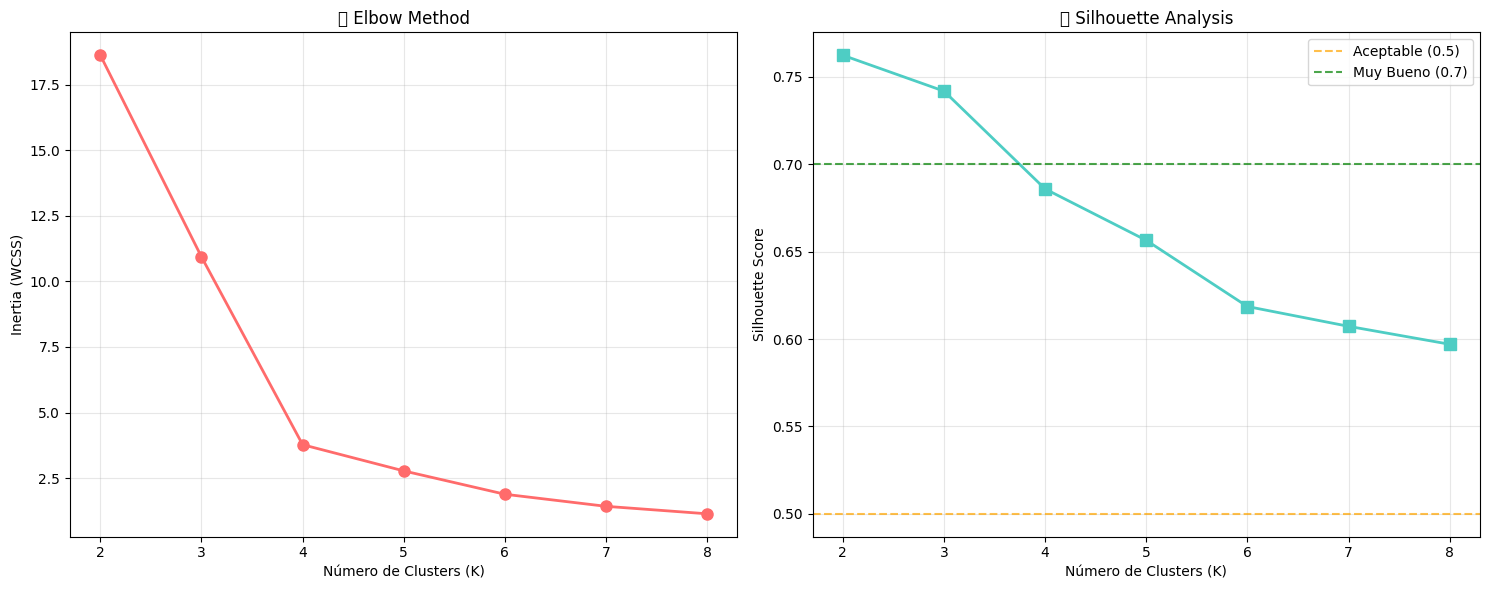


üß† ELBOW METHOD - DEEP DIVE ANALYSIS:

üìâ **¬øQu√© es exactamente 'el codo'?**
   - **Matem√°ticamente:** Punto donde la segunda derivada de WCSS vs K cambia m√°s dram√°ticamente
   - **Visualmente:** Donde la curva pasa de 'ca√≠da empinada' a 'ca√≠da suave'
   - **Conceptualmente:** Balance entre simplicidad (menos clusters) y precisi√≥n (menor error)

üìä **An√°lisis cuantitativo del codo:**
   K=2: Œî Inertia=-7.68, Œî¬≤=0.53
   K=3: Œî Inertia=-7.15, Œî¬≤=6.16
   K=4: Œî Inertia=-1.00, Œî¬≤=0.11
   K=5: Œî Inertia=-0.89, Œî¬≤=0.43
   K=6: Œî Inertia=-0.46, Œî¬≤=0.17

üéØ **Candidato por Elbow Method:** K=6
üéØ **Candidato por Silhouette:** K=2 (score=0.762)

ü§ù **DECISI√ìN FINAL:**
   ‚öñÔ∏è  Elbow sugiere K=6, Silhouette sugiere K=2
   üíº Considerando el contexto de negocio (3-5 segmentos esperados)...
   Elegimos K = 4 (balance elbow + contexto negocio)

üéØ ENTRENANDO MODELO FINAL CON K=4
Modelo entrenado:
   üìä Silhouette Score: 0.686
   üéØ Clusters encontrados

In [ ]:
# === OPERACI√ìN: CUSTOMER SEGMENTATION DISCOVERY ===
print("K-MEANS CLUSTERING: Descubriendo segmentos de clientes")
print(f"   Dataset: {X_final_for_clustering.shape} usando m√©todo '{final_method_name}'")

# 1. B√öSQUEDA DEL K √ìPTIMO - Elbow Method + Silhouette
print(f"\nüìà B√öSQUEDA DEL K √ìPTIMO:")

k_range = range(2, 9)
inertias = []
silhouette_scores = []

for k in k_range:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_final_for_clustering)

    # Calcular m√©tricas
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_final_for_clustering, labels)
    silhouette_scores.append(sil_score)

    print(f"   K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")

# 2. VISUALIZACI√ìN ELBOW METHOD + SILHOUETTE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method
axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='#FF6B6B')
axes[0].set_xlabel('N√∫mero de Clusters (K)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].set_title('üìà Elbow Method')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette Scores
axes[1].plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='#4ECDC4')
axes[1].axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Aceptable (0.5)')
axes[1].axhline(y=0.7, color='green', linestyle='--', alpha=0.7, label='Muy Bueno (0.7)')
axes[1].set_xlabel('N√∫mero de Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('üìä Silhouette Analysis')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

# 3. AN√ÅLISIS DEL ELBOW METHOD
print(f"\nüß† ELBOW METHOD - DEEP DIVE ANALYSIS:")
print(f"\nüìâ **¬øQu√© es exactamente 'el codo'?**")
print(f"   - **Matem√°ticamente:** Punto donde la segunda derivada de WCSS vs K cambia m√°s dram√°ticamente")
print(f"   - **Visualmente:** Donde la curva pasa de 'ca√≠da empinada' a 'ca√≠da suave'")
print(f"   - **Conceptualmente:** Balance entre simplicidad (menos clusters) y precisi√≥n (menor error)")

# Calcular diferencias para encontrar el codo
differences = np.diff(inertias)
second_differences = np.diff(differences)
elbow_candidate = k_range[np.argmin(second_differences) + 2]  # +2 por los dos diff()

print(f"\nüìä **An√°lisis cuantitativo del codo:**")
for i, k in enumerate(k_range[:-2]):
    print(f"   K={k}: Œî Inertia={differences[i]:.2f}, Œî¬≤={second_differences[i]:.2f}")

print(f"\nüéØ **Candidato por Elbow Method:** K={elbow_candidate}")

# 4. DECISI√ìN FINAL DE K
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"üéØ **Candidato por Silhouette:** K={best_k_silhouette} (score={max(silhouette_scores):.3f})")

print(f"\nü§ù **DECISI√ìN FINAL:**")
if elbow_candidate == best_k_silhouette:
    optimal_k = elbow_candidate
    print(f"   Ambos m√©todos coinciden: K = {optimal_k}")
else:
    print(f"   ‚öñÔ∏è  Elbow sugiere K={elbow_candidate}, Silhouette sugiere K={best_k_silhouette}")
    print(f"   üíº Considerando el contexto de negocio (3-5 segmentos esperados)...")
    # Elegir basado en contexto de negocio y calidad
    if 3 <= best_k_silhouette <= 5 and max(silhouette_scores) > 0.4:
        optimal_k = best_k_silhouette
        print(f"   Elegimos K = {optimal_k} (mejor silhouette + contexto negocio)")
    else:
        optimal_k = elbow_candidate if 3 <= elbow_candidate <= 5 else 4
        print(f"   Elegimos K = {optimal_k} (balance elbow + contexto negocio)")

# 5. MODELO FINAL CON K √ìPTIMO
print(f"\nüéØ ENTRENANDO MODELO FINAL CON K={optimal_k}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
final_labels = final_kmeans.fit_predict(X_final_for_clustering)
final_silhouette = silhouette_score(X_final_for_clustering, final_labels)

print(f"Modelo entrenado:")
print(f"   üìä Silhouette Score: {final_silhouette:.3f}")
print(f"   üéØ Clusters encontrados: {optimal_k}")
print(f"   üìà Inertia final: {final_kmeans.inertia_:.2f}")

# 6. DISTRIBUCI√ìN DE CLIENTES POR CLUSTER
cluster_counts = pd.Series(final_labels).value_counts().sort_index()
print(f"\nüë• DISTRIBUCI√ìN DE CLIENTES:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(final_labels)) * 100
    print(f"   Cluster {cluster_id}: {count:,} clientes ({percentage:.1f}%)")

# 7. AGREGAR CLUSTERS AL DATAFRAME ORIGINAL
df_customers['cluster'] = final_labels
df_customers['cluster_name'] = df_customers['cluster'].map({
    i: f"Cluster_{i}" for i in range(optimal_k)
})

print(f"\nClusters asignados al dataset original")

In [ ]:
# === OPERACI√ìN: INTELLIGENCE REPORT ===
print("ANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO")

# 1. PERFILES DE CLUSTERS
print(f"\nPERFILES DETALLADOS POR CLUSTER:")

for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_data = df_customers[df_customers['cluster'] == cluster_id]
    cluster_size = len(cluster_data)

    print(f"\n**CLUSTER {cluster_id}** ({cluster_size} clientes, {cluster_size/len(df_customers)*100:.1f}%)")

    # Estad√≠sticas usando las columnas CORRECTAS del Mall Customer Dataset
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    # Distribuci√≥n por g√©nero
    genre_counts = cluster_data['Genre'].value_counts()

    print(f"   **Perfil Demogr√°fico:**")
    print(f"      Edad promedio: {avg_age:.1f} a√±os")
    print(f"      Distribuci√≥n g√©nero: {dict(genre_counts)}")

    print(f"   **Perfil Financiero:**")
    print(f"      Ingreso anual: ${avg_income:.1f}k")
    print(f"      Spending Score: {avg_spending:.1f}/100")

    # Comparar con ground truth si est√° disponible
    if 'true_segment' in df_customers.columns:
        true_segments_in_cluster = cluster_data['true_segment'].value_counts()
        dominant_segment = true_segments_in_cluster.index[0]
        purity = true_segments_in_cluster.iloc[0] / cluster_size
        print(f"   üéØ **Ground Truth:** {dominant_segment} ({purity*100:.1f}% purity)")

# 2. MATRIZ DE CONFUSI√ìN CON GROUND TRUTH
if 'true_segment' in df_customers.columns:
    print(f"\nüéØ VALIDACI√ìN CON GROUND TRUTH:")
    confusion_matrix = pd.crosstab(df_customers['true_segment'], df_customers['cluster'],
                                  margins=True, margins_name="Total")
    print(confusion_matrix)

    # Calcular pureza de clusters
    cluster_purities = []
    for cluster_id in sorted(df_customers['cluster'].unique()):
        cluster_data = df_customers[df_customers['cluster'] == cluster_id]
        dominant_true_segment = cluster_data['true_segment'].mode().iloc[0]
        purity = (cluster_data['true_segment'] == dominant_true_segment).mean()
        cluster_purities.append(purity)

    average_purity = np.mean(cluster_purities)
    print(f"\nüìä Pureza promedio de clusters: {average_purity:.3f}")

# 3. VISUALIZACI√ìN DE CLUSTERS
if final_method_name == 'PCA':  # Si usamos PCA, podemos visualizar en 2D
    plt.figure(figsize=(15, 10))

    # Subplot 1: Clusters encontrados
    plt.subplot(2, 2, 1)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    for cluster_id in sorted(df_customers['cluster'].unique()):
        cluster_mask = final_labels == cluster_id
        plt.scatter(X_pca_2d[cluster_mask, 0], X_pca_2d[cluster_mask, 1],
                   c=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}',
                   alpha=0.7, s=50)

    # Plotear centroides
    if final_method_name == 'PCA':
        centroids_pca = final_kmeans.cluster_centers_
        plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                   c='red', marker='X', s=200, linewidths=3, label='Centroides')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Clusters Descubiertos (PCA 2D)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Subplot 2: Ground truth (si disponible)
    if 'true_segment' in df_customers.columns:
        plt.subplot(2, 2, 2)
        true_segment_colors = {'VIP': '#FF6B6B', 'Regular': '#4ECDC4',
                              'Occasional': '#45B7D1', 'At_Risk': '#96CEB4'}
        for segment, color in true_segment_colors.items():
            segment_mask = df_customers['true_segment'] == segment
            segment_indices = df_customers[segment_mask].index
            plt.scatter(X_pca_2d[segment_indices, 0], X_pca_2d[segment_indices, 1],
                       c=color, label=segment, alpha=0.7, s=50)

        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('Ground Truth Segments')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Subplot 3: Feature distribution by cluster
    plt.subplot(2, 2, 3)
    # Usar las columnas correctas del Mall Customer Dataset
    cluster_means = df_customers.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    cluster_means.plot(kind='bar', ax=plt.gca(), color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    plt.title('Perfil Promedio por Cluster')
    plt.ylabel('Valor Promedio')
    plt.legend(title='Caracter√≠sticas', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)

    # Subplot 4: Cluster sizes
    plt.subplot(2, 2, 4)
    cluster_sizes = df_customers['cluster'].value_counts().sort_index()
    colors_subset = [colors[i] for i in cluster_sizes.index]
    bars = plt.bar(cluster_sizes.index, cluster_sizes.values, color=colors_subset, alpha=0.7)
    plt.xlabel('Cluster ID')
    plt.ylabel('N√∫mero de Clientes')
    plt.title('Distribuci√≥n de Clientes por Cluster')

    # A√±adir etiquetas en las barras
    for bar, size in zip(bars, cluster_sizes.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{size}\n({size/len(df_customers)*100:.1f}%)',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

ANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO

PERFILES DETALLADOS POR CLUSTER:

**CLUSTER 0** (57 clientes, 28.5%)
   **Perfil Demogr√°fico:**
      Edad promedio: 28.4 a√±os
      Distribuci√≥n g√©nero: {'Female': np.int64(57)}
   **Perfil Financiero:**
      Ingreso anual: $59.7k
      Spending Score: 67.7/100

**CLUSTER 1** (47 clientes, 23.5%)
   **Perfil Demogr√°fico:**
      Edad promedio: 50.1 a√±os
      Distribuci√≥n g√©nero: {'Male': np.int64(47)}
   **Perfil Financiero:**
      Ingreso anual: $62.2k
      Spending Score: 29.6/100

**CLUSTER 2** (55 clientes, 27.5%)
   **Perfil Demogr√°fico:**
      Edad promedio: 48.1 a√±os
      Distribuci√≥n g√©nero: {'Female': np.int64(55)}
   **Perfil Financiero:**
      Ingreso anual: $58.8k
      Spending Score: 34.8/100

**CLUSTER 3** (41 clientes, 20.5%)
   **Perfil Demogr√°fico:**
      Edad promedio: 28.0 a√±os
      Distribuci√≥n g√©nero: {'Male': np.int64(41)}
   **Perfil Financiero:**
      Ingreso anual: $62.3k
      S

In [ ]:
# === AN√ÅLISIS SILHOUETTE POR CLUSTER ===
print(f"\nüìä AN√ÅLISIS SILHOUETTE DETALLADO:")

from sklearn.metrics import silhouette_samples  # Funci√≥n para silhouette por muestra individual

# Calcular silhouette score por muestra
sample_silhouette_values = silhouette_samples(X_final_for_clustering, final_labels)

# Estad√≠sticas por cluster
print(f"   üéØ Silhouette Score General: {final_silhouette:.3f}")
for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_silhouette_values = sample_silhouette_values[final_labels == cluster_id]
    cluster_avg_silhouette = cluster_silhouette_values.mean()
    cluster_min_silhouette = cluster_silhouette_values.min()

    print(f"   Cluster {cluster_id}: Œº={cluster_avg_silhouette:.3f}, "
          f"min={cluster_min_silhouette:.3f}, "
          f"samples={len(cluster_silhouette_values)}")


üìä AN√ÅLISIS SILHOUETTE DETALLADO:
   üéØ Silhouette Score General: 0.686
   Cluster 0: Œº=0.671, min=0.091, samples=57
   Cluster 1: Œº=0.659, min=0.156, samples=47
   Cluster 2: Œº=0.671, min=0.371, samples=55
   Cluster 3: Œº=0.759, min=0.001, samples=41


In [ ]:
# === DETECCI√ìN DE OUTLIERS EN CLUSTERING ===
print(f"\nüö® DETECCI√ìN DE OUTLIERS EN CLUSTERING:")
outlier_threshold = 0.0  # Silhouette negativo = mal asignado

for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_mask = final_labels == cluster_id
    cluster_silhouette = sample_silhouette_values[cluster_mask]
    outliers = np.sum(cluster_silhouette < outlier_threshold)

    if outliers > 0:
        print(f"   ‚ö†Ô∏è  Cluster {cluster_id}: {outliers} posibles outliers (silhouette < 0)")
else:
        print(f"   ‚úÖ Cluster {cluster_id}: Sin outliers detectados")


üö® DETECCI√ìN DE OUTLIERS EN CLUSTERING:
   ‚úÖ Cluster 3: Sin outliers detectados


In [ ]:
# === AN√ÅLISIS DE PERFILES POR CLUSTER ===
print(f"\nANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO")
print(f"\nPERFILES DETALLADOS POR CLUSTER:")

# An√°lisis por cluster usando las columnas REALES del dataset
for cluster_id in sorted(df_customers['cluster'].unique()):
    cluster_data = df_customers[df_customers['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_customers)) * 100

    # Estad√≠sticas usando las columnas CORRECTAS del Mall Customer Dataset
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    # Distribuci√≥n por g√©nero
    genre_counts = cluster_data['Genre'].value_counts()

    print(f"\nüè∑Ô∏è  **CLUSTER {cluster_id}** ({cluster_size} clientes, {cluster_pct:.1f}%)")
    print(f"   üìä **Perfil Demogr√°fico:**")
    print(f"      üë§ Edad promedio: {avg_age:.1f} a√±os")
    print(f"      üë• Distribuci√≥n g√©nero: {dict(genre_counts)}")

    print(f"   üí∞ **Perfil Financiero:**")
    print(f"      üíµ Ingreso anual: ${avg_income:.1f}k")
    print(f"      üõçÔ∏è  Spending Score: {avg_spending:.1f}/100")


ANALISIS DE SEGMENTOS DE CLIENTES - REPORTE EJECUTIVO

PERFILES DETALLADOS POR CLUSTER:

üè∑Ô∏è  **CLUSTER 0** (57 clientes, 28.5%)
   üìä **Perfil Demogr√°fico:**
      üë§ Edad promedio: 28.4 a√±os
      üë• Distribuci√≥n g√©nero: {'Female': np.int64(57)}
   üí∞ **Perfil Financiero:**
      üíµ Ingreso anual: $59.7k
      üõçÔ∏è  Spending Score: 67.7/100

üè∑Ô∏è  **CLUSTER 1** (47 clientes, 23.5%)
   üìä **Perfil Demogr√°fico:**
      üë§ Edad promedio: 50.1 a√±os
      üë• Distribuci√≥n g√©nero: {'Male': np.int64(47)}
   üí∞ **Perfil Financiero:**
      üíµ Ingreso anual: $62.2k
      üõçÔ∏è  Spending Score: 29.6/100

üè∑Ô∏è  **CLUSTER 2** (55 clientes, 27.5%)
   üìä **Perfil Demogr√°fico:**
      üë§ Edad promedio: 48.1 a√±os
      üë• Distribuci√≥n g√©nero: {'Female': np.int64(55)}
   üí∞ **Perfil Financiero:**
      üíµ Ingreso anual: $58.8k
      üõçÔ∏è  Spending Score: 34.8/100

üè∑Ô∏è  **CLUSTER 3** (41 clientes, 20.5%)
   üìä **Perfil Demogr√°fico:**
 

üîç Metodolog√≠a CRISP-DM:
1. ¬øQu√© fase fue m√°s desafiante y por qu√©?
- La de Data Preparation debido a la necesidad de seleccionar el scaler m√°s adecuado y decidir entre PCA o Feature Selection, evaluando su impacto en la calidad del clustering

2. ¬øC√≥mo el entendimiento del negocio influy√≥ en tus decisiones t√©cnicas?
- Influy√≥ principalmente en la decisi√≥n del n√∫mero √≥ptimo de clusters.

üßπ Data Preparation:

3. ¬øQu√© scaler funcion√≥ mejor y por qu√©?
- MinMaxScaler, ya que escal√≥ todas las variables al mismo rango [0,1], lo que es crucial para algoritmos basados en distancias como K-Means, ya que evita que las variables con rangos m√°s amplios dominen el c√°lculo de distancias.

4. ¬øPCA o Feature Selection fue m√°s efectivo para tu caso?
- PCA, obteniendo un score de 0.686, significativamente mayor que el Baseline (0.364) y la Selecci√≥n de Features (0.573).

5. ¬øC√≥mo balanceaste interpretabilidad vs performance?
- Se busc√≥ un balance al comparar el rendimiento de PCA (menos interpretable pero mejor performance) con la Selecci√≥n de Features (m√°s interpretable pero menor performance).

üß© Clustering:

6. ¬øEl Elbow Method y Silhouette coincidieron en el K √≥ptimo?
- No. El Elbow Method sugiri√≥ K=6, mientras que el Silhouette Score sugiri√≥ K=2. Esta discrepancia es com√∫n y resalta la necesidad de usar m√∫ltiples m√©todos y considerar el contexto de negocio.

7. ¬øLos clusters encontrados coinciden con la intuici√≥n de negocio?
- Si

8. ¬øQu√© har√≠as diferente si fueras a repetir el an√°lisis?
- Probar√≠a otros algoritmos de clustering para ver si identifican estructuras diferentes. Y considerar√≠a la inclusi√≥n de otras variables (si estuvieran disponibles), como frecuencia de visita, tipo de productos comprados, etc. para enriquecer la segmentaci√≥n

üíº Aplicaci√≥n Pr√°ctica:

9. ¬øC√≥mo presentar√≠as estos resultados en un contexto empresarial?
- En un reporte ejecutivo visual y conciso, destacando el objetivo del an√°lisis, la metodolog√≠a utilizada, los perfiles de cada cluster, las implicaciones del negocio y las limitaciones del an√°lisis (tama√±o del dataset, variables utilizadas).

10. ¬øQu√© valor aportan estas segmentaciones?
- Permiten a la empresa: Personalizar estrategias de marketing, optimizar la asignaci√≥n de recusros, mejorar la experiencia del cliente, identificar oportunidades de crecimiento, medir la efectividad de las acciones.

11. ¬øQu√© limitaciones tiene este an√°lisis?
- Tama√±o del dataset, Variables utilizadas, Interpretaci√≥n de PCA y sensibilidad de K-Means

DBSCAN: Clustering basado en densidad


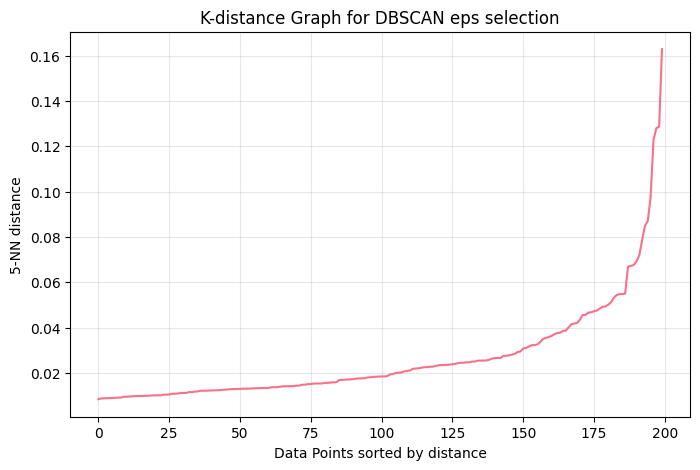

Clusters encontrados: 2
Puntos de ruido: 0
Porcentaje de ruido: 0.0%


In [ ]:
# === DBSCAN: Encuentra clusters de densidad arbitraria ===
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

print("DBSCAN: Clustering basado en densidad")

# 1. Encontrar par√°metros √≥ptimos
def find_optimal_eps(X, min_samples=5):
    """Encuentra eps √≥ptimo usando k-distance graph"""
    nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances[:, min_samples-1], axis=0)

    # Plotear k-distance graph
    plt.figure(figsize=(8, 5))
    plt.plot(distances)
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{min_samples}-NN distance')
    plt.title('K-distance Graph for DBSCAN eps selection')
    plt.grid(True, alpha=0.3)
    plt.show()

    return distances

# Encontrar eps
distances = find_optimal_eps(X_final_for_clustering)
optimal_eps = 0.5 # ¬øQu√© valor elegir√≠as del gr√°fico?

# Aplicar DBSCAN
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_final_for_clustering)

# An√°lisis de resultados
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_points = list(dbscan_labels).count(-1)

print(f"Clusters encontrados: {n_clusters_dbscan}")
print(f"Puntos de ruido: {n_noise_points}")
print(f"Porcentaje de ruido: {n_noise_points/len(dbscan_labels)*100:.1f}%")

HDBSCAN: Clustering jer√°rquico basado en densidad


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


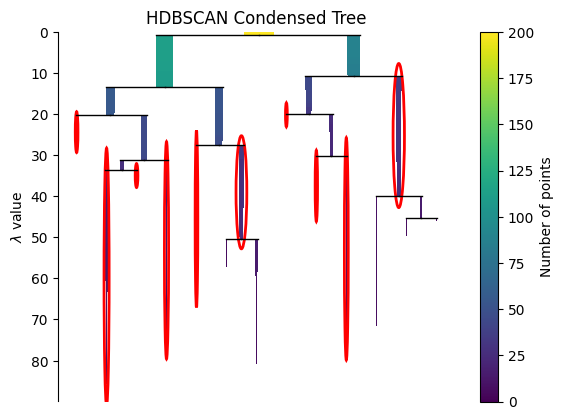

Clusters HDBSCAN: 10
Cluster persistence: [0.27622148 0.08457822 0.36164948 0.30674263 0.20626404 0.44949948
 0.02717863 0.00273795 0.12844966 0.29453453]


In [ ]:
# === HDBSCAN: Versi√≥n jer√°rquica de DBSCAN ===
# !pip install hdbscan  # Instalar si no est√° disponible

import hdbscan

print("HDBSCAN: Clustering jer√°rquico basado en densidad")

# Aplicar HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5,  # Tama√±o m√≠nimo de cluster
                                   min_samples=5,        # Muestras m√≠nimas por cluster
                                   metric='euclidean')

hdbscan_labels = hdbscan_clusterer.fit_predict(X_final_for_clustering)

# Visualizaci√≥n del √°rbol de clustering
hdbscan_clusterer.condensed_tree_.plot(select_clusters=True)
plt.title('HDBSCAN Condensed Tree')
plt.show()

print(f"Clusters HDBSCAN: {hdbscan_clusterer.labels_.max() + 1}")
print(f"Cluster persistence: {hdbscan_clusterer.cluster_persistence_}")

Gaussian Mixture Models: Clustering probabil√≠stico


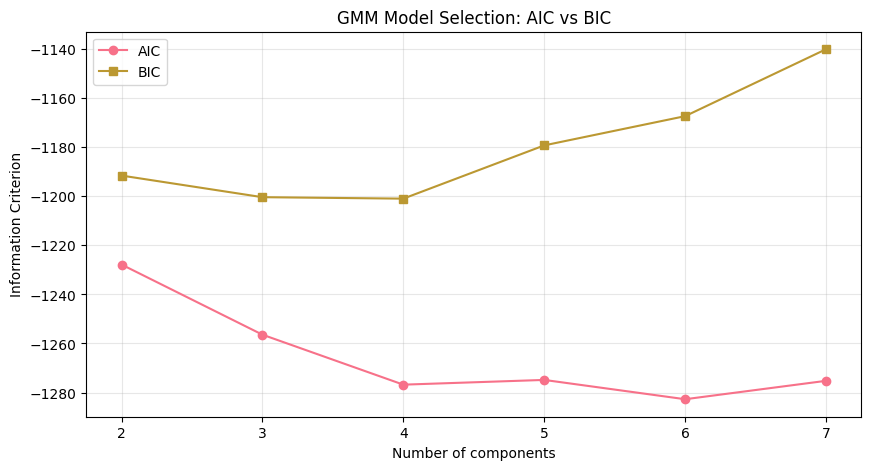

Componentes √≥ptimos (BIC): 4
Log-likelihood: 3.307


In [ ]:
# === GMM: Clustering probabil√≠stico ===
from sklearn.mixture import GaussianMixture

print("Gaussian Mixture Models: Clustering probabil√≠stico")

# Encontrar n√∫mero √≥ptimo de componentes
n_components_range = range(2, 8)
aic_scores = []
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_final_for_clustering)
    aic_scores.append(gmm.aic(X_final_for_clustering))
    bic_scores.append(gmm.bic(X_final_for_clustering))

# Plot AIC/BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_scores, 'o-', label='AIC')
plt.plot(n_components_range, bic_scores, 's-', label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('GMM Model Selection: AIC vs BIC')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Aplicar GMM √≥ptimo
optimal_n_components = n_components_range[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm_labels = gmm.fit_predict(X_final_for_clustering)
gmm_probabilities = gmm.predict_proba(X_final_for_clustering)

print(f"Componentes √≥ptimos (BIC): {optimal_n_components}")
print(f"Log-likelihood: {gmm.score(X_final_for_clustering):.3f}")

In [ ]:
# === SPECTRAL CLUSTERING: Clustering en espacio espectral ===
from sklearn.cluster import SpectralClustering, AgglomerativeClustering

print("Spectral Clustering: Clustering en espacio transformado")

spectral = SpectralClustering(n_clusters=optimal_k,
                             affinity='rbf',  # ¬ørbf, nearest_neighbors, o precomputed?
                             random_state=42)

spectral_labels = spectral.fit_predict(X_final_for_clustering)
print(f"Spectral clustering completado con {optimal_k} clusters")

# === AGGLOMERATIVE CLUSTERING ===
agglomerative = AgglomerativeClustering(n_clusters=optimal_k,
                                       linkage='ward')  # ward, complete, average, single

agglo_labels = agglomerative.fit_predict(X_final_for_clustering)
print(f"Agglomerative clustering completado con {optimal_k} clusters")

Spectral Clustering: Clustering en espacio transformado
Spectral clustering completado con 4 clusters
Agglomerative clustering completado con 4 clusters


In [ ]:
# === RFE: Feature Selection Recursivo ===
from sklearn.feature_selection import RFE, RFECV

print("RECURSIVE FEATURE ELIMINATION: Selecci√≥n iterativa de features")

# Clase auxiliar para RFE con clustering
class RFEClusteringEstimator(BaseEstimator, ClassifierMixin):
    """Estimador para RFE que usa KMeans + Silhouette"""
    def __init__(self, n_clusters=4):
        self.n_clusters = n_clusters

    def fit(self, X, y=None): # Accept y argument and ignore it
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        self.labels_ = self.kmeans_.fit_predict(X)
        # RFE requiere feature_importances_ o coef_
        self.feature_importances_ = self._calculate_feature_importance(X)
        return self

    def _calculate_feature_importance(self, X):
        """Calcula importancia usando varianza intra-cluster vs inter-cluster"""
        importances = []
        for i in range(X.shape[1]):
            feature_values = X[:, i]

            # Varianza total
            total_var = np.var(feature_values)

            # Varianza intra-cluster (promedio ponderado)
            intra_cluster_var = 0
            for cluster_id in range(self.n_clusters):
                cluster_mask = self.labels_ == cluster_id
                if np.sum(cluster_mask) > 1:  # Al menos 2 puntos en el cluster
                    cluster_var = np.var(feature_values[cluster_mask])
                    cluster_weight = np.sum(cluster_mask) / len(feature_values)
                    intra_cluster_var += cluster_var * cluster_weight

            # Importancia: ratio de separaci√≥n entre clusters
            if total_var > 0:
                importance = 1 - (intra_cluster_var / total_var)
            else:
                importance = 0

            importances.append(max(0, importance))  # No negativo

        return np.array(importances)

    def score(self, X, y=None):
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        return silhouette_score(X, labels)

    def predict(self, X):
        if hasattr(self, 'kmeans_'):
            return self.kmeans_.predict(X)
        else:
            kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
            return kmeans.fit_predict(X)

# Aplicar RFE
print("Aplicando RFE para encontrar las mejores features...")

rfe_estimator = RFEClusteringEstimator(n_clusters=4)
rfe = RFE(estimator=rfe_estimator,
          n_features_to_select=3,  # Seleccionar top 3 features
          step=1)  # Eliminar 1 feature por iteraci√≥n

y_dummy = np.zeros(X_preprocessed.shape[0])  # Etiquetas ficticias

rfe.fit(X_preprocessed, y_dummy)
X_rfe = rfe.transform(X_preprocessed)
rfe_features = np.array(feature_names)[rfe.support_]
rfe_score = evaluate_features_for_clustering(X_rfe)

print(f"Features seleccionadas por RFE: {list(rfe_features)}")
print(f"Silhouette Score RFE: {rfe_score:.3f}")
print(f"Ranking de features: {dict(zip(feature_names, rfe.ranking_))}")

RECURSIVE FEATURE ELIMINATION: Selecci√≥n iterativa de features
Aplicando RFE para encontrar las mejores features...
Features seleccionadas por RFE: [np.str_('Age'), np.str_('Genre_Female'), np.str_('Genre_Male')]
Silhouette Score RFE: 0.637
Ranking de features: {'Age': np.int64(1), 'Annual Income (k$)': np.int64(3), 'Spending Score (1-100)': np.int64(2), 'Genre_Female': np.int64(1), 'Genre_Male': np.int64(1)}


In [ ]:
# === IRIS DATASET ===
from sklearn.datasets import load_iris

print("IRIS DATASET: El cl√°sico dataset de flores")

iris = load_iris()
X_iris = iris.data
y_iris_true = iris.target  # Ground truth para validaci√≥n

print(f"Iris shape: {X_iris.shape}")
print(f"Features: {iris.feature_names}")
print(f"Especies: {iris.target_names}")

# Aplicar pipeline completo en Iris
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

pca_iris = PCA(n_components=2)
X_iris_pca = pca_iris.fit_transform(X_iris_scaled)

# Clustering en Iris
kmeans_iris = KMeans(n_clusters=3, random_state=42)
iris_clusters = kmeans_iris.fit_predict(X_iris_pca)

# Comparaci√≥n con ground truth
from sklearn.metrics import adjusted_rand_score  # Adjusted Rand Index
ari_score = adjusted_rand_score(y_iris_true, iris_clusters)
print(f"Adjusted Rand Index vs ground truth: {ari_score:.3f}")

IRIS DATASET: El cl√°sico dataset de flores
Iris shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Especies: ['setosa' 'versicolor' 'virginica']
Adjusted Rand Index vs ground truth: 0.433


In [ ]:
# === WINE DATASET ===
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = wine.data
y_wine_true = wine.target

print(f"Wine Dataset shape: {X_wine.shape}")
print(f"Features: {wine.feature_names[:5]}...")  # Primeras 5 features
print(f"Clases de vino: {wine.target_names}")

# Tu an√°lisis completo aca...
# (normalmente: escalar -> PCA -> clustering -> comparar con ground truth con ARI)

Wine Dataset shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']...
Clases de vino: ['class_0' 'class_1' 'class_2']


In [ ]:
# === SYNTHETIC BLOBS ===
from sklearn.datasets import make_blobs

# Generar datos sint√©ticos con caracter√≠sticas conocidas
X_blobs, y_blobs_true = make_blobs(n_samples=300,
                                  centers=4,
                                  n_features=2,  # ¬øCu√°ntas dimensiones?
                                  cluster_std=1.0,  # ¬øQu√© dispersi√≥n?
                                  random_state=42)

print(f"Synthetic blobs shape: {X_blobs.shape}")

# ¬øPuede tu pipeline detectar los 4 clusters correctamente?
# Si, los datos fueron creados con 4 centros bien definidos, as√≠ que si se usa
# un KMeans(n_clusters = 4) el modelo deber√≠a agruparlos casi perfectamente

Synthetic blobs shape: (300, 2)


t-SNE: Visualizaci√≥n no lineal de alta dimensi√≥n


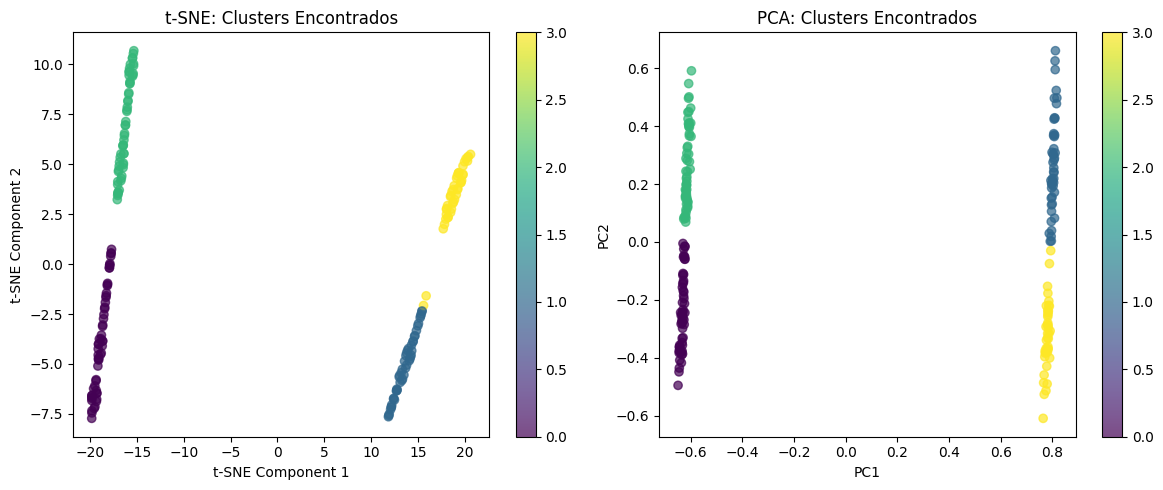

In [ ]:
# === t-SNE ===
from sklearn.manifold import TSNE

print("t-SNE: Visualizaci√≥n no lineal de alta dimensi√≥n")

tsne = TSNE(n_components=2,
           perplexity=30, # T√≠picamente 5-50
           random_state=42)

X_tsne = tsne.fit_transform(X_final_for_clustering)

# Plot t-SNE con clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title('t-SNE: Clusters Encontrados')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()

plt.subplot(1, 2, 2)
# Comparar con PCA
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title('PCA: Clusters Encontrados')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


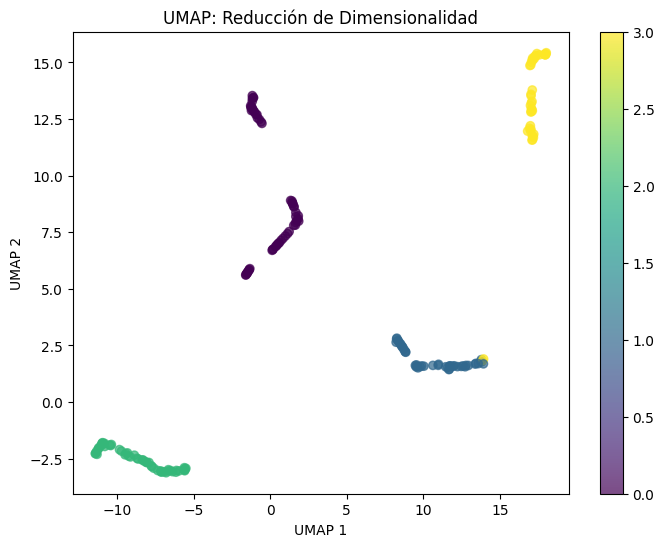

In [ ]:
# === UMAP ===
# !pip install umap-learn
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_final_for_clustering)

# Visualizaci√≥n UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title('UMAP: Reducci√≥n de Dimensionalidad')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

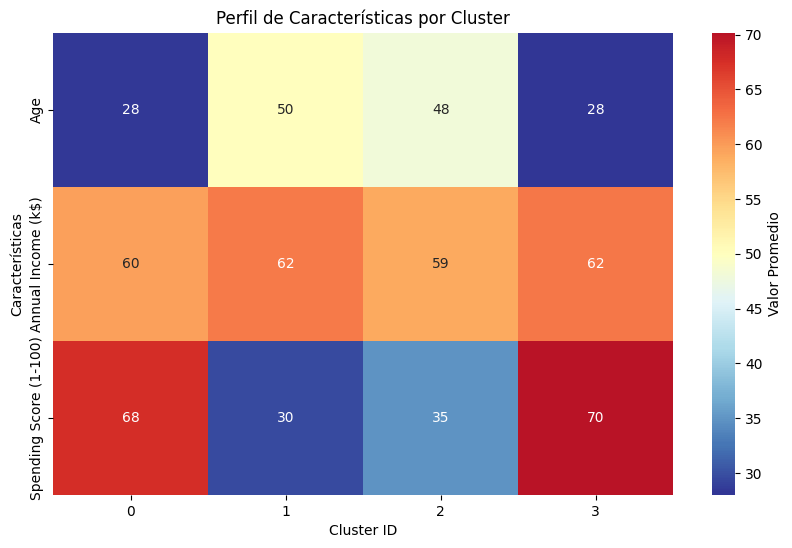

In [ ]:
# === HEATMAP DETALLADO ===
import seaborn as sns

# Crear matriz de caracter√≠sticas por cluster
cluster_profiles = df_customers.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T,
           annot=True,
           cmap='RdYlBu_r',
           center=cluster_profiles.values.mean(),
           cbar_kws={'label': 'Valor Promedio'})
plt.title('Perfil de Caracter√≠sticas por Cluster')
plt.ylabel('Caracter√≠sticas')
plt.xlabel('Cluster ID')
plt.show()

In [ ]:
# === BENCHMARK DE TODOS LOS ALGORITMOS ===
algorithms = {
    'K-Means': KMeans(n_clusters=optimal_k, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Spectral': SpectralClustering(n_clusters=optimal_k, random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=optimal_k),
    # 'HDBSCAN': hdbscan.HDBSCAN(min_cluster_size=20),  # Descomenta si tienes hdbscan
}

results = {}

for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X_final_for_clustering)

        # Solo calcular silhouette si tenemos m√°s de 1 cluster
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X_final_for_clustering, labels)
        else:
            score = -1  # Score inv√°lido

        results[name] = {
            'silhouette': score,
            'n_clusters': n_clusters,
            'n_noise': list(labels).count(-1) if -1 in labels else 0
        }

        print(f"{name}: Silhouette={score:.3f}, Clusters={n_clusters}, Noise={results[name]['n_noise']}")

    except Exception as e:
        print(f"{name}: ERROR - {str(e)}")

# Visualizaci√≥n comparativa
algorithms_names = list(results.keys())
silhouette_scores = [results[name]['silhouette'] for name in algorithms_names]

plt.figure(figsize=(12, 6))
bars = plt.bar(algorithms_names, silhouette_scores, alpha=0.7)
plt.ylabel('Silhouette Score')
plt.title('Comparaci√≥n de Algoritmos de Clustering')
plt.xticks(rotation=45)

# Colorear barras seg√∫n rendimiento
for i, (bar, score) in enumerate(zip(bars, silhouette_scores)):
    if score >= 0.5:
        bar.set_color('green')
    elif score >= 0.25:
        bar.set_color('orange')
    else:
        bar.set_color('red')

    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

K-Means: Silhouette=0.687, Clusters=4, Noise=0
DBSCAN: Silhouette=0.762, Clusters=2, Noise=0
Spectral: Silhouette=0.686, Clusters=4, Noise=0
AgglomerativeClustering: Silhouette=0.687, Clusters=4, Noise=0
